# Task 1: Data Exploration and Processing

## Part 1: Explore your specific dataset
by calculating basic statistics number of samples and number of samples per class: is your dataset balanced? min / avg / max length of text reading through 100+ samples: noteworthy style, vocabulary, idioms.

### Imports

In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np

from utils.task1_utils import plot_class_distribution


### Load Data

In [ ]:
def load_medical_dataset(dataset_name="argilla/medical-domain", split=None):
    """
    Loads the dataset

    Parameters:
        dataset_name (string): Defaults to medical-domain dataset from Hugging Face*

    Returns:
        Dataset (if split is not None) or DatasetDict (split is None)
    """
    try:
        # Load the dataset
        dataset = load_dataset(dataset_name, split=split)
        print("Dataset loaded successfully!")
        print(f"Available splits: {list(dataset.keys())}")
        
        return dataset
    
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None
    

In [ ]:
dataset = load_medical_dataset()


Dataset loaded successfully!
Available splits: ['train']


### Data Visualization/Analysis

In [ ]:
def analyze_dataset_statistics(dataset):
    """
    Analyze the length of text and distribution of samples across different classes in the dataset
    """
    for split_name, split_data in dataset.items():
        
        # Display number of samples
        print(f"\nNumber of samples: {len(split_data)}")
        print(f"\tFeatures: {list(split_data.features.keys())}")
        #print(f"  First sample: {split_data[1]}")
        if len(split_data) > 0:
            # Calculate Min, Avg, Max length of text
            text_lengths = [len(sample['text']) for sample in split_data if 'text' in sample]
            if text_lengths:
                min_length = min(text_lengths)
                avg_length = sum(text_lengths) / len(text_lengths)
                max_length = max(text_lengths)
                print(f"\tText length:\n\t\tMin: {min_length}\n\t\tAvg: {avg_length:.2f}\n\t\tMax: {max_length}")
        
        print("\nAnalyzing class distribution:")
        # Count samples per class
        class_counts = {}
        total_samples = len(split_data)
        
        for sample in split_data:
            if 'prediction' in sample and isinstance(sample['prediction'], list):
                for label in sample['prediction']:
                    if 'label' in label:
                        prediction = label['label']
                        class_counts[prediction] = class_counts.get(prediction, 0) + 1
        
        # Display results
        if class_counts:
            print("\nClass distribution:")
            for class_name, count in class_counts.items():
                percentage = (count / total_samples) * 100
                print(f"\t{class_name}: {count} samples ({percentage:.2f}%)")
        else:
            print("No prediction labels found in this split")

if dataset:
    analyze_dataset_statistics(dataset)


Number of samples: 4966
	Features: ['text', 'inputs', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata', 'status', 'event_timestamp', 'metrics']
	Text length:
		Min: 11
		Avg: 3052.31
		Max: 18425

Analyzing class distribution:

Class distribution:
	 Gastroenterology: 224 samples (4.51%)
	 Surgery: 1088 samples (21.91%)
	 Radiology: 273 samples (5.50%)
	 SOAP / Chart / Progress Notes: 166 samples (3.34%)
	 Letters: 23 samples (0.46%)
	 Lab Medicine - Pathology: 8 samples (0.16%)
	 Consult - History and Phy.: 516 samples (10.39%)
	 Podiatry: 47 samples (0.95%)
	 General Medicine: 259 samples (5.22%)
	 Psychiatry / Psychology: 53 samples (1.07%)
	 Cardiovascular / Pulmonary: 371 samples (7.47%)
	 Urology: 156 samples (3.14%)
	 Ophthalmology: 83 samples (1.67%)
	 Physical Medicine - Rehab: 21 samples (0.42%)
	 Neurology: 223 samples (4.49%)
	 Autopsy: 8 samples (0.16%)
	 Orthopedic: 355 samples (7.15%)
	 Hematology - Oncolo

In [ ]:
texts = dataset['train']['text']
labels = dataset['train']['prediction']
# Load into a DataFrame for easier handling
df = pd.DataFrame({
    "text": texts,
    "label": labels
})

df['label'].head(10).tolist()

[[{'label': ' Gastroenterology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' SOAP / Chart / Progress Notes', 'score': 1.0}],
 [{'label': ' Letters', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}],
 [{'label': ' Radiology', 'score': 1.0}],
 [{'label': ' Lab Medicine - Pathology', 'score': 1.0}],
 [{'label': ' Surgery', 'score': 1.0}]]

In [ ]:
def extract_label(prediction_list):
    """
    """
    if isinstance(prediction_list, list) and len(prediction_list) > 0:
        item = prediction_list[0]
        if isinstance(item, dict) and 'label' in item:
            return item['label'].strip()  # remove space
    return None

df = pd.DataFrame({
    "text": texts,
    "label": [extract_label(p) for p in labels]
})
df['label'].head(10).tolist()

['Gastroenterology',
 'Surgery',
 'Radiology',
 'Surgery',
 'SOAP / Chart / Progress Notes',
 'Letters',
 'Surgery',
 'Radiology',
 'Lab Medicine - Pathology',
 'Surgery']

Total samples: 4966
Unique labels: 40

Samples per class:
label
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surge

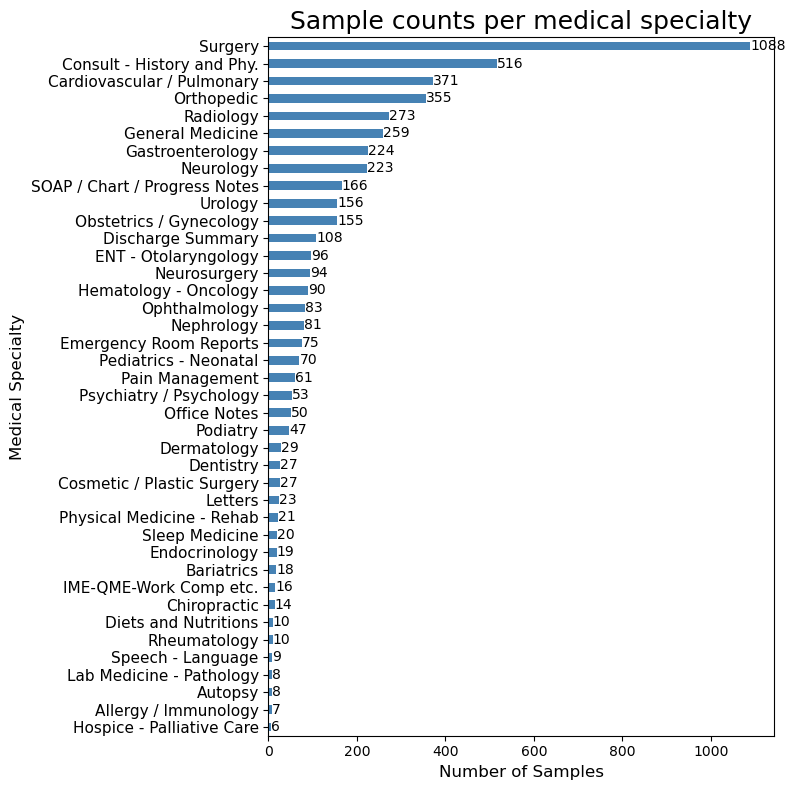

In [ ]:
# --- 1. Basic info ---
print(f"Total samples: {len(df)}")
print(f"Unique labels: {df['label'].nunique()}")

# Count per class
label_counts = df['label'].value_counts()
print("\nSamples per class:")
print(label_counts)

# Check balance
print("\nDataset balance:")
print((label_counts / len(df) * 100).round(2))


plot_class_distribution(label_counts)


In [ ]:
# --- 2. Text length statistics ---
df['length'] = df['text'].apply(lambda x: len(str(x).split()))

print("\nText length statistics:")
print(f"Min: {df['length'].min()}")
print(f"Avg: {df['length'].mean():.2f}")
print(f"Max: {df['length'].max()}")



Text length statistics:
Min: 1
Avg: 465.45
Max: 3029


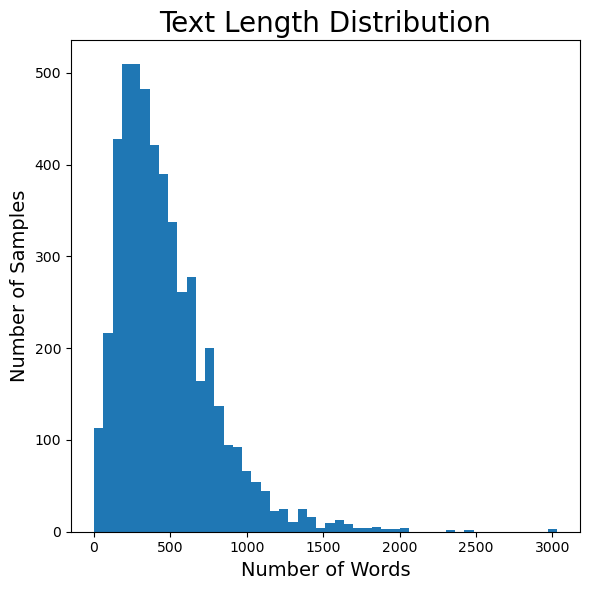

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.hist(df['length'], bins=50)

plt.title("Text Length Distribution", fontsize=20)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# --- 3. Example inspection ---

# number of examples per class (adjust if needed)
examples_per_class = 3

# loop over each unique label
for label_name in sorted(df['label'].dropna().unique()):
    print(f"\n{'='*20} {label_name} {'='*20}")
    subset = df[df['label'] == label_name]
    
    # sample up to 'examples_per_class' texts from this class
    sample_texts = subset['text'].sample(min(len(subset), examples_per_class), random_state=42)
    
    for i, text in enumerate(sample_texts, start=1):
        # shorten text and replace newlines for readability
        preview = str(text).replace('\n', ' ')[:400]
        print(f"\nExample {i}:\n{preview} ...")




==================== Allergy / Immunology ====================

Example 1:
HISTORY:,  I had the pleasure of meeting and evaluating the patient referred today for evaluation and treatment of chronic sinusitis.  As you are well aware, she is a pleasant 50-year-old female who states she started having severe sinusitis about two to three months ago with facial discomfort, nasal congestion, eye pain, and postnasal drip symptoms.  She states she really has sinus problems, but  ...

Example 2:
SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not ...

Example 3:
HISTORY: , A 34-year-old male presents today self-referred at the recommendation of Emerge

### **Several characteristics of the dataset**:

The **highly imbalanced** dataset contains diverse clinical reports with structured templates and domain-specific terminology.  
The preprocessing pipeline should be designed to balance **noise reduction** with preservation of **clinically informative details**.

- **Preserve short clinical abbreviations** (e.g., *BP, HR, CT, MRI, COPD, MI*) that are semantically rich.  
  → Avoid aggressive short-token filtering to retain diagnostic and procedural meaning.

- **Retain quantitative expressions and measurements** (e.g.,  *L4–L5 disc*).  
  → Numeric tokens may need to be kept as they often indicate dosage, anatomical levels, or severity.

- **Remove repetitive clinical boilerplate** (e.g., *HISTORY*, *PROCEDURE*).  
  → An extended MEDICAL_STOPWORDS list should be there to filter non-discriminative template headers or any phrases common to all specialties.

- **Normalize medical vocabulary through lemmatization.**  
  → Lemmatization should be applied to improve TF-IDF consistency.

- **Handle mixed structured and free-text content.**  
  → Apply lowercasing and symbol cleaning, while preserving key medical units, abbreviations, and bigrams for semantic clustering.

Overall, the preprocessing in next step should aim to **reduce template redundancy** while **preserving abbreviations, measurements, and procedural terms** that define specialty-specific patterns.  



## Part 2 Establish a structured and flexible (configurable) processing pipeline 
with steps for reading documents from file tokenizing normalizing (lowercase, lemmatize/stem, …) filtering (stop words, …)
Use the script clustering.py as a template for clustering your text

In [ ]:
# Load imports
from utils.task1_utils import   plot_crosstab, plot_cluster_sizes, top_terms_per_cluster, plot_two_metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.metrics import ( silhouette_score, 
                              homogeneity_completeness_v_measure, 
                              adjusted_rand_score, )
from tqdm.auto import tqdm
import pandas as pd
import spacy
import re

### P1. Data Cleaning Decisions

The cleaning decision based on the information above is to

- Remove entries where the text length is < 40 chars

In [ ]:
# Visualising entries where text contains < n chars

n_chars = 40 # tried and this is the highest n that doesn't include entries with meaningful text
def get_short_text_idx(df):
    short_idx = [i for i, t in enumerate(df['text']) if len(t) < n_chars]
    short_df = df.loc[short_idx, ['label', 'text']]
    print(short_df.to_string(index=True))
    return short_idx
short_text_idx = get_short_text_idx(df)
print("Initial lenth: ", len(df))
df = df.drop(index=short_text_idx)
print("Removed length: ", len(short_text_idx))
print("New length: ", len(df))

                              label                     text
14                 General Medicine             SUBJECTIVE:,
613                    Chiropractic  REASON FOR EVALUATION:,
1181                      Radiology            INDICATIONS:,
1381                     Orthopedic  REASON FOR EVALUATION:,
1415                   Office Notes        CHIEF COMPLAINT:,
1638                Pain Management              OPERATION:,
1715                        Surgery           INDICATION:  ,
1784                   Office Notes      CHIEF COMPLAINT:  ,
2493                        Urology        CHIEF COMPLAINT:,
2791     Consult - History and Phy.        CHIEF COMPLAINT:,
3205               Gastroenterology           INDICATION:  ,
3849     Cardiovascular / Pulmonary            INDICATIONS:,
3886  SOAP / Chart / Progress Notes             SUBJECTIVE:,
4160                     Orthopedic        CHIEF COMPLAINT:,
4371                     Orthopedic      CHIEF COMPLAINT:  ,
4933                Pain

### P2. Stopwords Filtering

- Add dataset-specific stopwords to be filtered out

In [ ]:
def get_specific_stopwords(df, min_stopword_len=5):
    caps = []
    word = ''
    def _find_cap(s):
        for ele in str(s):
            if ord(ele) < 65 or ord(ele) > 90:
                return 0
        return 1
    texts = df['text']
    for text in texts: 
        for char in text:
            if _find_cap(char):
                word += char
            elif len(word) > 0:
                if char == ':': # stop if the word has : at the end
                    caps.append(word)
                    word = ''
                elif char == ' ' and word[-1] != ' ': # continue if there is a space detected but not 2 in a row
                    word += char
                elif len(word) >= min_stopword_len: # final char is neither caps nor :, maybe >1 space in a row
                    word = word[:-1] if word[-1] == ' ' else word
                    caps.append(word)
                    word = ''
                else: # 2 spaces in a row and length < min_stopword_len
                    word = ''
    return caps

In [ ]:
capital_words = get_specific_stopwords(df, min_stopword_len=6)
unique_terms, counts = np.unique(capital_words, return_counts=True)
result = np.vstack((unique_terms, counts)).T
result = result[np.argsort(-counts.astype(int), kind="stable")]

for i in range(len(result)):
    print(f"{i}. {result[i,:]}" )

0. ['ANESTHESIA' '1307']
1. ['PROCEDURE' '1300']
2. ['PREOPERATIVE DIAGNOSIS' '1171']
3. ['POSTOPERATIVE DIAGNOSIS' '1087']
4. ['PHYSICAL EXAMINATION' '992']
5. ['HISTORY OF PRESENT ILLNESS' '954']
6. ['IMPRESSION' '945']
7. ['HEENT' '889']
8. ['ALLERGIES' '874']
9. ['PAST MEDICAL HISTORY' '843']
10. ['REVIEW OF SYSTEMS' '787']
11. ['SOCIAL HISTORY' '787']
12. ['PLAN' '780']
13. ['COMPLICATIONS' '753']
14. ['MEDICATIONS' '726']
15. ['FINDINGS' '678']
16. ['FAMILY HISTORY' '642']
17. ['ESTIMATED BLOOD LOSS' '607']
18. ['VITAL SIGNS' '605']
19. ['PROCEDURE PERFORMED' '601']
20. ['ABDOMEN' '592']
21. ['POSTOPERATIVE DIAGNOSES' '590']
22. ['GENERAL' '565']
23. ['PREOPERATIVE DIAGNOSES' '546']
24. ['NECK' '517']
25. ['EXTREMITIES' '499']
26. ['ASSESSMENT' '459']
27. ['CHIEF COMPLAINT' '452']
28. ['HISTORY' '418']
29. ['DESCRIPTION OF PROCEDURE' '412']
30. ['LUNGS' '385']
31. ['INDICATIONS' '373']
32. ['PAST SURGICAL HISTORY' '369']
33. ['EXAM' '365']
34. ['CARDIOVASCULAR' '357']
35. ['PROCE

In [ ]:
# Store selected stopwords in csv
min_stopword_frequency = 30 # NOTE try changing this value
custom_stopwords = result[result[:, 1].astype(int) >= 30][:, 0]

# Save stopwords to CSV
STOPWORD_PATH = "./Task1/utils_files/custom_stopwords.csv"
pd.DataFrame(custom_stopwords).to_csv(
    STOPWORD_PATH,
    sep=",",
    header=False,
    index=False
)

print(f"Saved {len(custom_stopwords)} custom stopwords to {STOPWORD_PATH}")

Saved 173 custom stopwords to ./Task1/utils_files/custom_stopwords.csv


### P3. Text Processing

- Text Processing (lemmatizing, tokenization, filtering by identified stopwords in custom_stopwords.csv)


In [ ]:
# Load custom stopwords from CSV
from utils.preprocessing_enhanced import load_stopwords
STOPWORD_PATH = "./Task1/utils_files/custom_stopwords.csv"
CUSTOM_STOPWORDS = load_stopwords(STOPWORD_PATH)


[preprocessing] Loaded 173 stopwords from ./Task1/utils_files/custom_stopwords.csv


In [ ]:
# -------------------------------------
# 3. Preprocessing
# -------------------------------------
from utils.preprocessing_enhanced import preprocess_text

# Three configs
CONFIG_NONE = {
    "enable": False
}

CONFIG_MINIMAL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": False,
    "remove_numbers": False,
    "keep_short_tokens": False,
    "remove_medical_boilerplate": False,
}

CONFIG_MEDIUM = {
    "enable": True,
    "lowercase": True,
    "lemmatize": False,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": False,
    "remove_medical_boilerplate": False,
}


CONFIG_MEDIUM2 = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": False,
    "keep_short_tokens": False,
    "remove_medical_boilerplate": False,
}

CONFIG_FULL = {
    "enable": True,
    "lowercase": True,
    "lemmatize": True,
    "remove_stopwords": True,
    "remove_numbers": True,
    "keep_short_tokens": True,
    "remove_medical_boilerplate": True,
}


# Apply preprocessing

# df = df.head(100) # reduce the sample size to speed up for trials

df["text_none"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_NONE) for t in tqdm(df["text"], desc="Processing")]
df["text_min"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_MINIMAL) for t in tqdm(df["text"], desc="Processing")]
df["text_med2"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_MEDIUM2) for t in tqdm(df["text"], desc="Processing")]
df["text_med"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_MEDIUM) for t in tqdm(df["text"], desc="Processing")]
df["text_full"] = [preprocess_text(t, custom_stopwords=CUSTOM_STOPWORDS, **CONFIG_FULL) for t in tqdm(df["text"], desc="Processing")]





Processing: 100%|██████████| 4950/4950 [05:16<00:00, 15.62it/s]


In [ ]:
df["text_none"][0]

'PREOPERATIVE DIAGNOSIS:,  Iron deficiency anemia.,POSTOPERATIVE DIAGNOSIS:,  Diverticulosis.,PROCEDURE:,  Colonoscopy.,MEDICATIONS: , MAC.,PROCEDURE: , The Olympus pediatric variable colonoscope was introduced into the rectum and advanced carefully through the colon to the cecum identified by the ileocecal valve and the appendiceal orifice.  Preparation was good, although there was some residual material in the cecum that was difficult to clear completely.  The mucosa was normal throughout the colon.  No polyps or other lesions were identified, and no blood was noted.  Some diverticula were seen of the sigmoid colon with no luminal narrowing or evidence of inflammation.  A retroflex view of the anorectal junction showed no hemorrhoids.  The patient tolerated the procedure well and was sent to the recovery room.,FINAL DIAGNOSES:,1.  Diverticulosis in the sigmoid.,2.  Otherwise normal colonoscopy to the cecum.,RECOMMENDATIONS:,1.  Follow up with Dr. X as needed.,2.  Screening colonoscop

In [ ]:
df["text_full"][0]

'preoperative     iron deficiency anemia postoperative     diverticulosis     colonoscopy medication     mac     olympus pediatric variable colonoscope introduce rectum advance carefully colon cecum identify ileocecal valve appendiceal orifice    preparation good residual material cecum difficult clear completely    mucosa normal colon    polyp lesion identify blood note    diverticula see sigmoid colon luminal narrowing evidence inflammation    retroflex view anorectal junction show hemorrhoid    patient tolerate send recovery room final       diverticulosis sigmoid       normal colonoscopy cecum       follow dr need       screening colonoscopy    year       additional evaluation cause anemia appropriate'

### P4. Vectorization

In [ ]:
# -------------------------------------
# 4. Vectorization
# -------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(series):
    tqdm.pandas(desc="Vectorizing TF-IDF")

    vec = TfidfVectorizer(
        max_features=10000, 
        ngram_range=(1,2),
        min_df=2,
    )

    # Convert into list via tqdm
    text_list = list(tqdm(series, desc="Reading text for TF-IDF"))

    X = vec.fit_transform(text_list)
    return X, vec

X_none,  vec_none  = tfidf_vectorize(df["text_none"])
X_min,   vec_min   = tfidf_vectorize(df["text_min"])
X_med,   vec_med   = tfidf_vectorize(df["text_med"])
X_med2,   vec_med2   = tfidf_vectorize(df["text_med2"])
X_full,  vec_full  = tfidf_vectorize(df["text_full"])



Reading text for TF-IDF: 100%|██████████| 4950/4950 [00:00<00:00, 2427429.53it/s]


### P5. Clustering and Evaluation

In [ ]:
# -------------------------------------
# 5. KMeans clustering and evaluation
# -------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

K_true = df["label"].nunique()
interval = 10
Ks = [K_true - interval, K_true, K_true + interval]

def run_kmeans_experiment(X):
    results = []
    for K in tqdm(Ks):
        km = KMeans(n_clusters=K, n_init=10, random_state=42)
        labels = km.fit_predict(X)

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })
        
        # save K = true label count 
        if K == K_true:
            df[f"cluster"] = labels

    return pd.DataFrame(results)

res_none = run_kmeans_experiment(X_none)
res_min  = run_kmeans_experiment(X_min)
res_med  = run_kmeans_experiment(X_med)
res_full = run_kmeans_experiment(X_full)
res_med2= run_kmeans_experiment(X_med2)  # This config's clustering is saved in df, overwriting previous 
  


100%|██████████| 3/3 [00:37<00:00, 12.46s/it]


In [ ]:
import os

res_none["config"] = "TFIDF_NONE"
res_min["config"]  = "TFIDF_MINIMAL_PROC"
res_med["config"]  = "TFIDF_MEDIUM_PROC"
res_med2["config"]  = "TFIDF_BEST_PROCESSED"
res_full["config"] = "TFIDF_FULL_PROC"

results_all = pd.concat([res_none, res_min, res_med, res_med2, res_full], ignore_index=True)

save_dir = "Task1/results"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "results_1.csv")
results_all.to_csv(save_path, index=False)
results_all

,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.032098,0.312671,0.316647,0.314647,0.126401,TFIDF_NONE
1,40,0.035441,0.350687,0.301613,0.324304,0.070451,TFIDF_NONE
2,50,0.042565,0.363724,0.306619,0.332739,0.069918,TFIDF_NONE
3,30,0.029723,0.320824,0.305175,0.312804,0.088287,TFIDF_MINIMAL_PROC
4,40,0.040073,0.344708,0.315150,0.329267,0.103183,TFIDF_MINIMAL_PROC
5,50,0.044087,0.353676,0.302820,0.326278,0.065381,TFIDF_MINIMAL_PROC
6,30,0.037783,0.354124,0.330933,0.342136,0.097300,TFIDF_MEDIUM_PROC
7,40,0.042187,0.382067,0.332143,0.355360,0.082025,TFIDF_MEDIUM_PROC
8,50,0.049922,0.406496,0.324543,0.360926,0.071581,TFIDF_MEDIUM_PROC
9,30,0.037131,0.361230,0.327962,0.343793,0.084605,TFIDF_BEST_PROCESSED


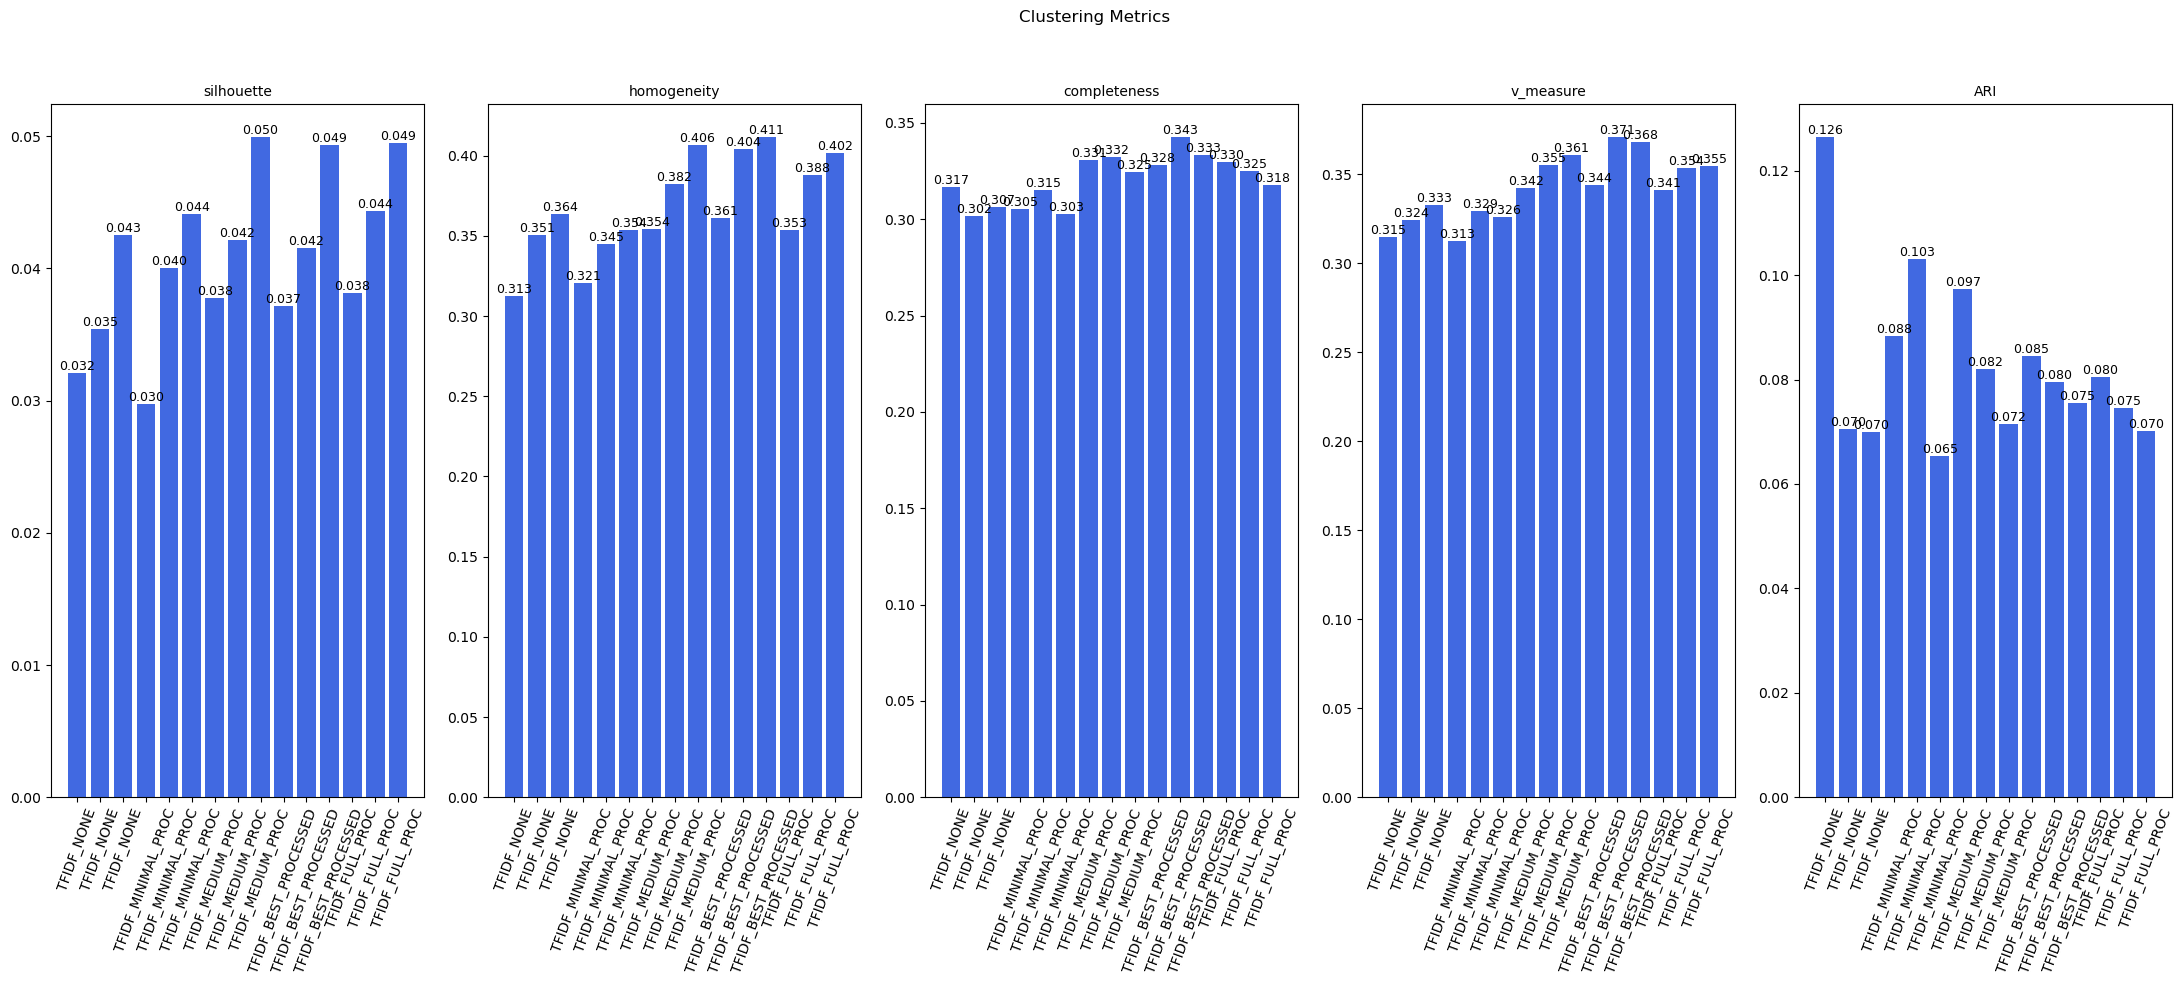

In [ ]:
# # -------------------------------------
# # 6. Metric comparison plot
# # -------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from utils.task1_utils import plot_metrics_bar

results_TFIDF = results_all.copy()

plot_metrics_bar(results_TFIDF,figsize=(22, 10))


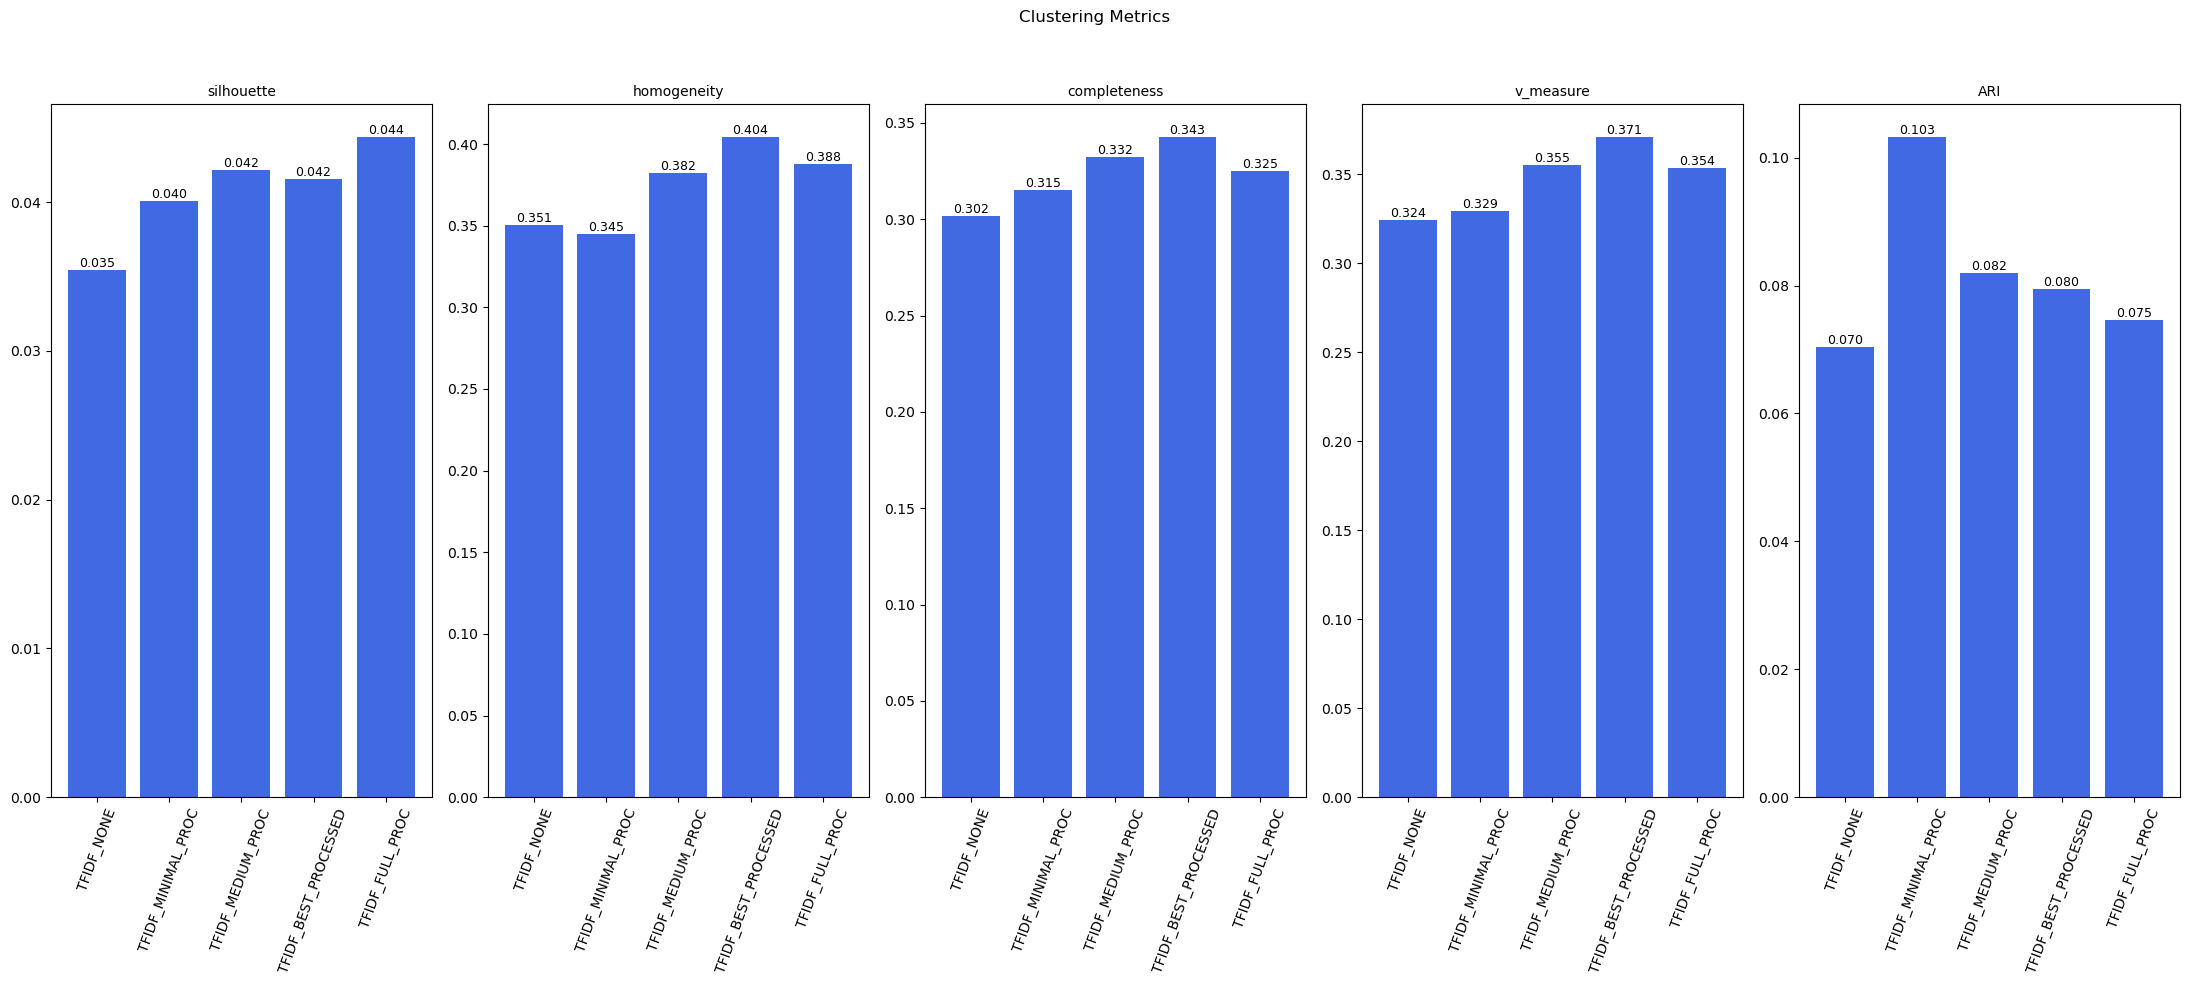

In [ ]:
results_TFIDF_k40 = results_all[results_all["K"] == 40].copy()
plot_metrics_bar(results_TFIDF_k40)


#### **Summary of  Metric comparison**

- Overall, the configuration ("enable": True, "lowercase": True, "lemmatize": True, "remove_stopwords": True, "remove_numbers": False,  "keep_short_tokens": False, "remove_medical_boilerplate": False,) achieved the best balance between interpretability and clustering quality.

In [ ]:
# Select manually the best 
X_best = X_med2
vec_best = vec_med2
res_best=res_med2

In [ ]:
# -------------------------------------
# 7. Top terms per cluster
# -------------------------------------
from utils.task1_utils import top_terms_per_cluster

top_terms = top_terms_per_cluster(X_best, df["cluster"], vec_best, n_terms=10)
top_terms


{0: array(['c5', 'c6', 'c5 c6', 'c4', 'cervical', 'c4 c5', 'c7', 'c3',
        'c6 c7', 'anterior cervical'], dtype=object),
 1: array(['clear', 'history', 'mom', 'normal', 'child', 'day', 'patient',
        'mother', 'cough', 'regular'], dtype=object),
 2: array(['uterus', 'place', 'cervix', 'uterine', 'trocar', 'remove',
        'ovary', 'pelvic', 'tube', 'patient'], dtype=object),
 3: array(['history', 'coronary', 'pain', 'coronary artery', 'chest',
        'chest pain', 'artery disease', 'artery', 'patient', 'disease'],
       dtype=object),
 4: array(['procedure', 'patient', 'tube', 'place', 'nasal', 'tooth',
        'anesthesia', 'diagnosis', 'remove', 'ear'], dtype=object),
 5: array(['history', 'patient', 'pain', 'deny', 'past', 'negative', 'normal',
        'allergy', 'medical', 'medication'], dtype=object),
 6: array(['ct', 'pelvi', 'contrast', 'kidney', 'abdoman pelvi', 'see',
        'abdoman', 'exam', 'normal', 'liver'], dtype=object),
 7: array(['95', 'right', 'hct', '96'

#### **Summary of Top Terms Interpretation**

Some top contributing tokens are relevant to a specific class.

For example: 

    wound, tissue, fracture, tumor → Surgery 
    foot, tendon, osteotomy → Podiatry 
    colon, polyp, colonoscopy → Gastroenterology


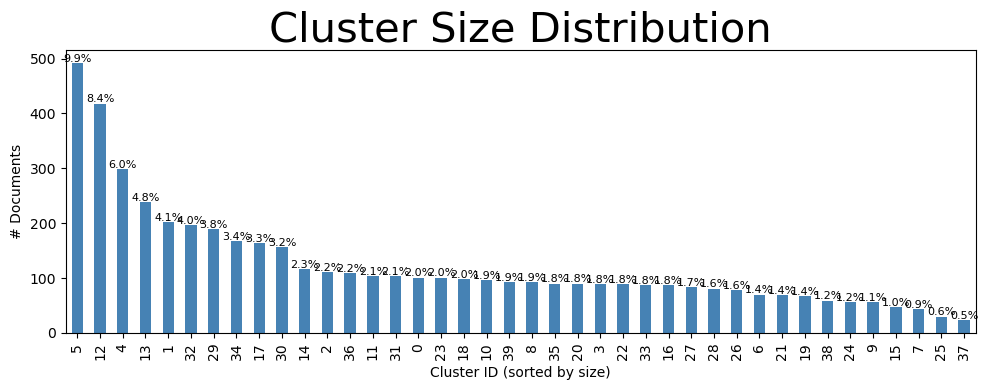

In [ ]:
# -------------------------------------
# 8. Cluster size distribution
# -------------------------------------
from utils.task1_utils import plot_cluster_sizes
plot_cluster_sizes(df)


#### **Summary of Clustering Sizes Analysis**

- The dataset is **highly imbalanced**, with a few specialties like "Surgery" and "Consult – History and Phy." dominating the samples, see statistics in **part 1**.

- The clustering results mirror this imbalance — a few large clusters capture most documents, while many small clusters contain very few.

- This suggests that the clustering may reflect the overall data distribution but lacks fine-grained separation among smaller medical specialties.

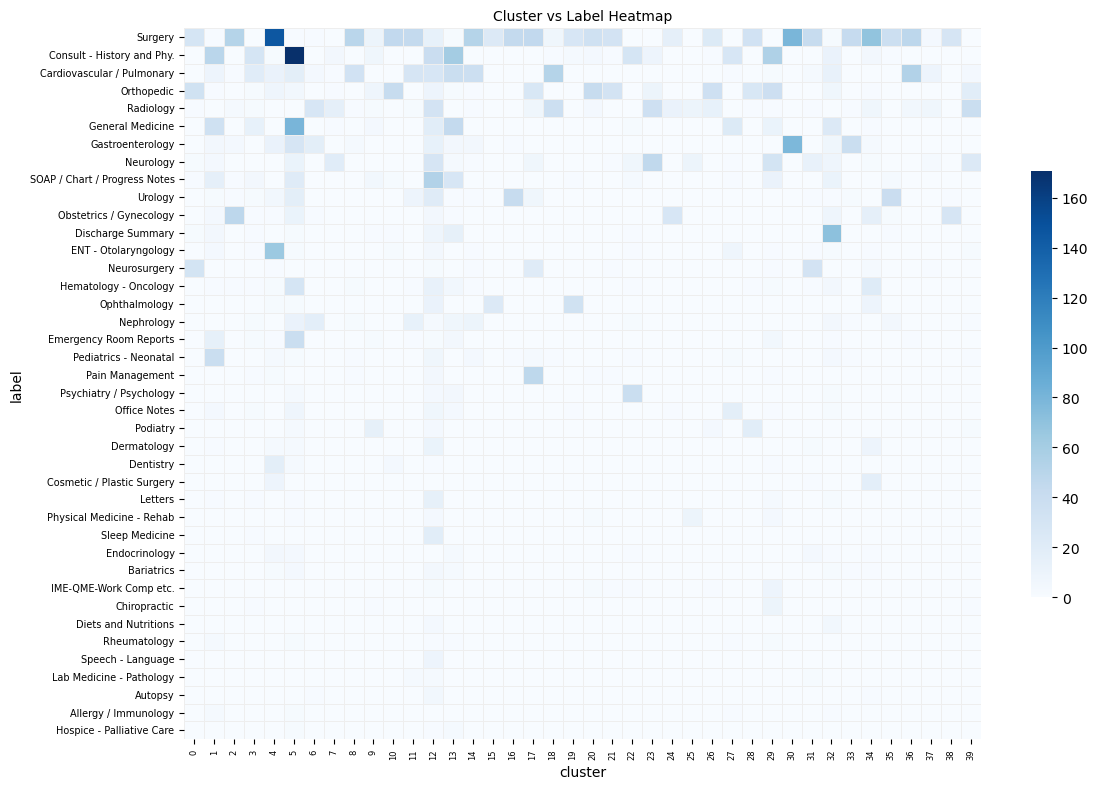

In [ ]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils.task1_utils import plot_crosstab
plot_crosstab(df,figsize=(12,8))


#### **Summary of Compare Label vs. Cluster**

From this heatmap, we can make a few clear observations:

- Cluster–label alignment is weak overall, with most labels spreading across many clusters and vice versa.

- A few strong alignments stand out — for example, Surgery aligns heavily with a single dominant cluster (around cluster 0), and Consult – History and Phy. has another distinct concentration (around cluster 24).

- Row-wise observation checks how each label maps to clusters. Good examples are: 
    -  **Ophthalmology**, has **only one cluster** dominant, where the top terms are 'eye', 'chamber', 'lens', 'cataract', 'intraocular', 'speculum', etc.
    -  **Podiatry**, has **only one cluster** dominant, where the top terms are 'foot', 'metatarsal', 'tendon', 'plantar','ankle', etc. 
    -  **ENT**, has **only one cluster** dominant, where the top terms are 'ear', 'tube', 'otitis', 'nasal', 'myringotomy', 'middle ear', 'tympanic' etc.

In short, the model differentiates major document types but still mixes many similar or overlapping specialties.

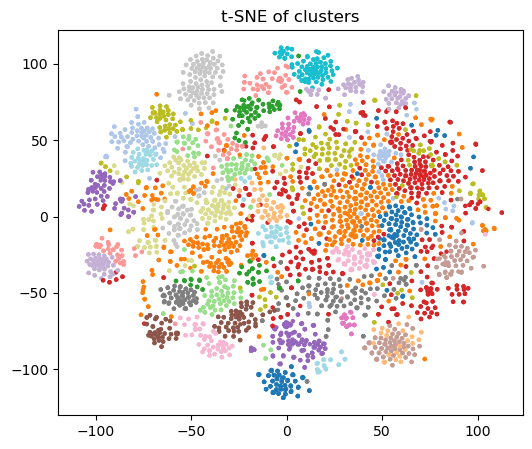

In [ ]:
# -------------------------------------
# 10. t-SNE visualization
# -------------------------------------
from utils.task1_utils import plot_tsne
plot_tsne(X_best, df["cluster"])

#### **Summary of 2D Visualization**

- This t-SNE plot shows several compact, well-separated clusters alongside a large mixed central region. The tight color groups suggest that some document types (e.g., specific procedures) are clearly distinguishable.

- However, the overlapping center indicates that many notes share common vocabulary and are harder to separate.

- Overall, the clustering captures partial thematic structure but not full category separation — consistent with the silhouette score.

## Part 3: Further exploration- Class Imbalance Handling

Use sample weighting to handle class imbalance (minority classes get higher weights in evaluation).

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Analyze imbalance
class_counts = df['label'].value_counts()
print("=" * 70)
print("Class Imbalance Analysis")
print("=" * 70)
print(f"Total classes:     {df['label'].nunique()}")
print(f"Largest class:     {class_counts.max()} samples")
print(f"Smallest class:    {class_counts.min()} samples")
print(f"Imbalance ratio:   {class_counts.max() / class_counts.min():.2f}:1")
print(f"Mean samples:      {class_counts.mean():.1f}")
print("=" * 70)

# Compute sample weights
unique_classes = df['label'].unique()

class_weights = compute_class_weight(
    'balanced',
    classes=unique_classes,
    y=df['label']
)

weight_dict = dict(zip(unique_classes, class_weights))
sample_weights = df['label'].map(weight_dict).values

print("\nSample Weights Computed")
print("-" * 70)
print(f"Min weight: {sample_weights.min():.3f}")
print(f"Max weight: {sample_weights.max():.3f}")
print(f"Weight ratio: {sample_weights.max() / sample_weights.min():.2f}:1")
print("-" * 70)

df['sample_weight'] = sample_weights

print("\nSample weight examples (first 5):")
print(df[['label', 'sample_weight']].head())



Class Imbalance Analysis
Total classes:     40
Largest class:     1087 samples
Smallest class:    6 samples
Imbalance ratio:   181.17:1
Mean samples:      123.8

Sample Weights Computed
----------------------------------------------------------------------
Min weight: 0.114
Max weight: 20.625
Weight ratio: 181.17:1
----------------------------------------------------------------------

Sample weight examples (first 5):
                           label  sample_weight
0               Gastroenterology       0.554933
1                        Surgery       0.113845
2                      Radiology       0.454963
3                        Surgery       0.113845
4  SOAP / Chart / Progress Notes       0.750000


In [ ]:
# -------------------------------------
# Weighted KMeans clustering and evaluation
# -------------------------------------

K_true = df["label"].nunique()
interval = 10
Ks = [K_true - interval, K_true, K_true + interval]

def run_kmeans_weighted(X, sample_weight=None):
    results = []
    for K in tqdm(Ks, desc="Running Weighted KMeans"):
        km = KMeans(n_clusters=K, n_init=10, random_state=42)

        km.fit(X, sample_weight=sample_weight)  # Key changes here
        labels = km.labels_                     # extract labels

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })

        if K == K_true:
            df["cluster"] = labels # The weighted KMEANS on processed data

    return pd.DataFrame(results)


res_none_weighted = run_kmeans_weighted(
    X_none,
    sample_weight=df["sample_weight"].values
)

res_weighted = run_kmeans_weighted(
    X_best,
    sample_weight=df["sample_weight"].values
)

res_none_weighted["config"] = "TFIDF_NONE_WEIGHTED"

res_weighted["config"]  = "TFIDF_PROCESSED_WEIGHTED"


results_all = pd.concat([res_none, res_best,res_none_weighted, res_weighted], ignore_index=True) 
results_all



Running Weighted KMeans: 100%|██████████| 3/3 [00:40<00:00, 13.56s/it]


,K,silhouette,homogeneity,completeness,v_measure,ARI,config
0,30,0.032098,0.312671,0.316647,0.314647,0.126401,TFIDF_NONE
1,40,0.035441,0.350687,0.301613,0.324304,0.070451,TFIDF_NONE
2,50,0.042565,0.363724,0.306619,0.332739,0.069918,TFIDF_NONE
3,30,0.037131,0.361230,0.327962,0.343793,0.084605,TFIDF_BEST_PROCESSED
4,40,0.041565,0.404127,0.342550,0.370799,0.079528,TFIDF_BEST_PROCESSED
5,50,0.049362,0.411416,0.333229,0.368218,0.075450,TFIDF_BEST_PROCESSED
6,30,0.006072,0.272876,0.326235,0.297180,0.175685,TFIDF_NONE_WEIGHTED
7,40,0.009047,0.261566,0.316869,0.286573,0.176688,TFIDF_NONE_WEIGHTED
8,50,0.010090,0.314183,0.354104,0.332951,0.192532,TFIDF_NONE_WEIGHTED
9,30,0.018920,0.307297,0.387158,0.342636,0.139936,TFIDF_PROCESSED_WEIGHTED


In [ ]:
import os

save_dir = "Task1/results"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "results_2.csv")
results_all.to_csv(save_path, index=False)

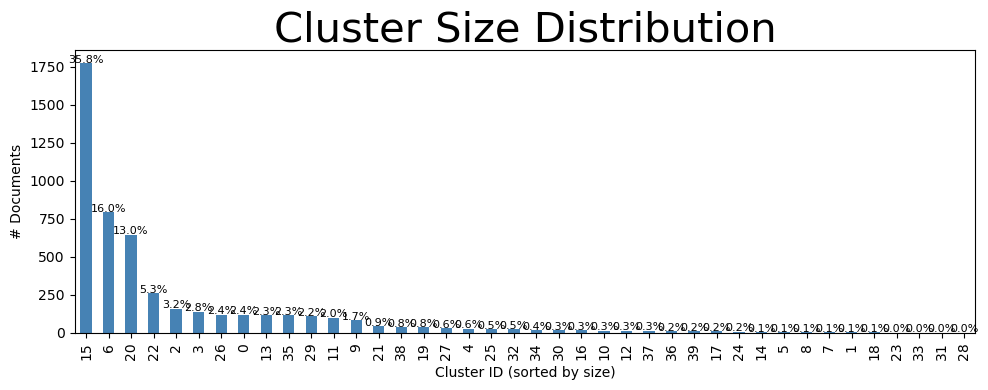

In [ ]:
# -------------------------------------
# 8. Cluster size distribution
# -------------------------------------
from utils.task1_utils import plot_cluster_sizes
plot_cluster_sizes(df)


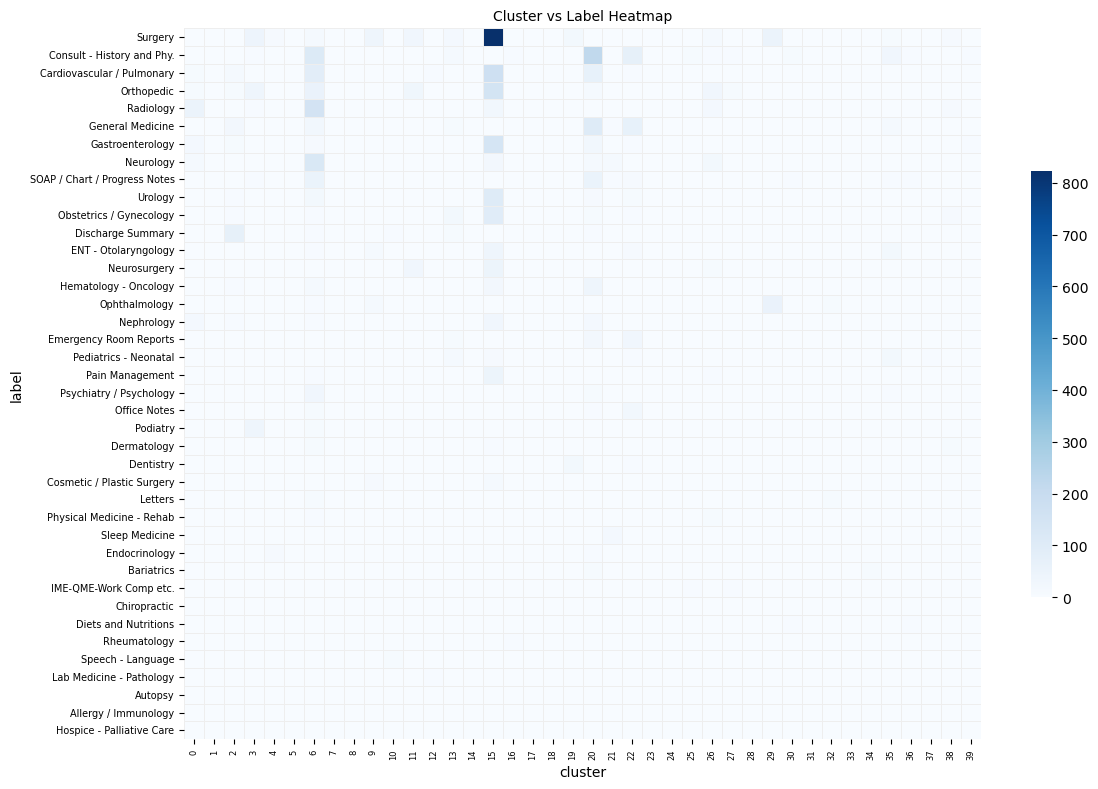

In [ ]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils.task1_utils import plot_crosstab
plot_crosstab(df,figsize=(12,8))

## Sentence-level Embeddings

- Using processed text for embedding
- Dense vector dim: 384 or 768

In [ ]:
from sentence_transformers import SentenceTransformer

# Sentence Embedding Model Loading
print("Loading sentence embedding model...")
model = SentenceTransformer("all-mpnet-base-v2")  # "all-mpnet-base-v2" or "all-MiniLM-L6-v2"


Loading sentence embedding model...


c:\Users\Esther\anaconda3\envs\nlp-esther\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Esther\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
print("Encoding sentences into embeddings...")

embeddings_med = model.encode(
    df["text_med"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True,
    batch_size=32
)

embeddings_med.shape

Encoding sentences into embeddings...


Batches:  98%|█████████▊| 152/155 [31:19<00:09,  3.09s/it]

### Clustering on embedding vectors

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

def run_embedding_clustering(X):
    results = []
    for K in Ks:  # same Ks = [K_true-10, K_true, K_true+10]
        km = KMeans(n_clusters=K, n_init=10, random_state=42)
        labels = km.fit_predict(X)

        sil = silhouette_score(X, labels)
        h, c, v = homogeneity_completeness_v_measure(df["label"], labels)
        ari = adjusted_rand_score(df["label"], labels)

        results.append({
            "K": K,
            "silhouette": sil,
            "homogeneity": h,
            "completeness": c,
            "v_measure": v,
            "ARI": ari
        })
        
        if K == K_true:
            df[f"cluster_embedding"] = labels

    return pd.DataFrame(results)

res_sentence_med = run_embedding_clustering(embeddings_med)
res_sentence_med["config"] = "SEMANTIC_EMBEDDING_PROCESSED"
res_sentence_med


In [ ]:
print("Encoding non-processed sentences into embeddings...")

embeddings_none = model.encode(
    df["text_none"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True,
    batch_size=32
)

embeddings_none.shape


In [ ]:
res_sentence_none = run_embedding_clustering(embeddings_none)
res_sentence_none["config"] = "SEMANTIC_EMBEDDING_NONE"
res_sentence_none


In [ ]:
results_all = pd.concat([res_none, res_best,res_none_weighted, res_weighted, res_sentence_none, res_sentence_med], ignore_index=True)
results_all

In [ ]:
import os

save_dir = "Task1/results"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "results_3.csv")
results_all.to_csv(save_path, index=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from utils.task1_utils import plot_metrics_bar_rotated

results_k40 = results_all[results_all["K"] == 40].copy()
plot_metrics_bar_rotated(results_k40)

In [ ]:
from utils.task1_utils import plot_tsne
plot_tsne(embeddings_none, df["cluster_embedding"])

In [ ]:
# -------------------------------------
# 9. Crosstab heatmap
# -------------------------------------
from utils.task1_utils import plot_crosstab
df["cluster"] = df["cluster_embedding"]
plot_crosstab(df)

# Task 2: Data Exploration and Processing

## 1. Manual data inspection
- Investigate which standard and potential new NER types are most prominent in your data set (i.e., manual data inspection)

Following visual inspection, some of the prominent NERs found are: DATE, BODY_PART, DOSAGE, MEASUREMENT, DRUG and SYMPTOM. 

Examples:
 1. DATE: 12/20/2005, 1/19/96
 2. BODY_PART: nose, abdomen, knee
 3. DOSAGE:  10/40 mg one a day, 0.25 micrograms a day, 50 mg twice a day, 10 ml
 4. MEASUREMENT: 3.98 kg, 8mm, pulse of 84, blood pressure 108/65
 5. DRUG:  Vytorin, Rocaltrol, Carvedilol, Cozaar,  Lasix
 6. SYMPTOM: erythematous, chest pain, constipated

Where, DATE is a **standard NER in spacy** and the remaining ones fall in the medicine domain category. 

## 2. Apply the standard NER classifier of spaCy


### Imports

In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import spacy
import random
import json
import re
## Commented the following as the annotations have already been done 
## and should not be run again, else the results will change
# import utils.annotations_utils as utils_ann # ChatGPT API called to identify keywords/phrases associated with entities

%load_ext autoreload
%autoreload 2


/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
%reload_ext autoreload

### Load Data

In [ ]:
# ============================
# 1: Load Dataset
# ============================
dataset = load_dataset("argilla/medical-domain", split="train")
print("Features available")
print(dataset.column_names)
print("Format of 'prediction' column")
print(dataset.features['prediction'])
print("Dataset length: ", len(dataset))

Features available
['text', 'inputs', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata', 'status', 'event_timestamp', 'metrics']
Format of 'prediction' column
List({'label': Value('string'), 'score': Value('float64')})
Dataset length:  4966


### Filter such that we keep only samples pertaining to 'Surgery'

In [ ]:
dataset_slimmed = dataset.filter(
	lambda row: (
		isinstance(row["text"], str)
        and row["text"] != ''
		and 'Surgery' in str(row["prediction"][0])
	)
)
dataset = dataset_slimmed
print(len(dataset))

1115


In [ ]:
# ================================================
# 2: Define Entity Schema
# ================================================
# Our final gold-label schema
CUSTOM_LABELS = ['SYMPTOM', 'BODY_PART', 'DISEASE', 'DRUG', 'ROUTE']

print("Our NER schema = ", CUSTOM_LABELS)


Our NER schema =  ['SYMPTOM', 'BODY_PART', 'DISEASE', 'DRUG', 'ROUTE']


In [ ]:
# =========================================
# 3: Pick N samples manually
# =========================================
PATH_TO_ANNOTATIONS = "ner/samples/"
SEED = 42 
random.seed(SEED)
np.random.seed(SEED)

N_SAMPLES = 4   # select a proper number to contain 100 ground-truth NERs 
sampled_texts = []

for i in range(N_SAMPLES):
	row = dataset[np.random.randint(0, len(dataset))]
	text = row["text"]
	sampled_texts.append(text)

df_samples = pd.DataFrame({"text": sampled_texts})
df_samples.to_csv(PATH_TO_ANNOTATIONS + "unannotated_samples.csv", index=False)

print("Saved unannotated_samples.csv with", len(df_samples), "sentences")


Saved unannotated_samples.csv with 4 sentences


## 3. Evaluation of Standard NER

### Perform manual annotations, then split into train/test 

 The annotation format is: 

	{
		"classes": List(labels), 
		"annotations": List(
			[str(text), dict("entities": List(List(start idx, end idx, class)))]
		)
	}
Where each item in "annotations" is a sentence.


#### Manual Annotations (with AI assistance)

**NOTE: Not running this section as unannotated_samples.csv, annotatated_samples\*.json are already generated.**

Additionally, you will need an API key in your environment for OpenAI to run it.

Jump to [Train/Test splitting](#traintest-split-of-annotations)

In [ ]:
# unannotated_samples_path = PATH_TO_ANNOTATIONS + "unannotated_samples.csv"
# df = pd.read_csv(unannotated_samples_path, header=0)
# text = df['text'].to_list()
# num_examples_per_label = 30
# annotations = utils_ann.chatgpt_annotate_text(CUSTOM_LABELS, text, num_examples_per_label)

In [ ]:
# for label in annotations.keys():
# 	print(f" Label: {label} ".center(30, '='))
# 	for indexed_words in annotations[label]:
# 		print(indexed_words)

======= Label: SYMPTOM =======
[0, 'pain']
[1, 'deformity']
[2, 'dysfunction']
[3, 'atrophy']
[4, 'flexible talus']
[5, 'motion changes']
[6, 'sensation changes']
[7, 'bleeding']
[8, 'infection']
[9, 'swelling']
[10, 'muscular dystrophy']
[11, 'hematoma']
[12, 'thinning']
[13, 'resection']
[14, 'inflammation']
[15, 'weakness']
[16, 'sensitivity']
[17, 'numbness']
[18, 'impaired function']
[19, 'low mobility']
[20, 'tenderness']
[21, 'ache']
[22, 'limited motion']
[23, 'stiffness']
[24, 'difficulty']
[25, 'irritation']
[26, 'complications']
[27, 'malalignment']
[28, 'protrusion']
[29, 'increased risk']
====== Label: BODY_PART ======
[0, 'foot']
[1, 'arm']
[2, 'forearm']
[3, 'elbow']
[4, 'mandible']
[5, 'maxilla']
[6, 'leg']
[7, 'shoulder']
[8, 'talocalcaneal joint']
[9, 'extremity']
[10, 'muscle']
[11, 'thigh']
[12, 'spine']
[13, 'sinus']
[14, 'upper limb']
[15, 'arm']
[16, 'heel']
[17, 'lower surface']
[18, 'biceps']
[19, 'nerve']
[20, 'foot arch']
[21, 'vein']
[22, 'artery']
[23, 'bon

In [ ]:
# # Specify examples to exclude or modify
# # NOTE: pop larger indices first to maintain index ordering of earlier items after deletion
# annotations['SYMPTOM'].pop(29)

# annotations['BODY_PART'][8][1] = 'joint'
# annotations['BODY_PART'][14][1] = 'limb'
# annotations['BODY_PART'].pop(17)

# annotations['DISEASE'][0][1] = 'renal disease'

# annotations['DRUG'][3][1] = 'anesthetics'
# annotations['DRUG'][9][1] = 'saline'
# annotations['DRUG'].pop(28)

# annotations['ROUTE'].pop(17)
# annotations['ROUTE'].pop(6)

# for label in annotations.keys():
# 	print(f" Label: {label} ".center(30, '='))
# 	words_list = []
# 	for idx, word in annotations[label]:
# 		words_list.append(word)
# 		print(word)
# 	annotations[label] = words_list

======= Label: SYMPTOM =======
pain
deformity
dysfunction
atrophy
flexible talus
motion changes
sensation changes
bleeding
infection
swelling
muscular dystrophy
hematoma
thinning
resection
inflammation
weakness
sensitivity
numbness
impaired function
low mobility
tenderness
ache
limited motion
stiffness
difficulty
irritation
complications
malalignment
protrusion
====== Label: BODY_PART ======
foot
arm
forearm
elbow
mandible
maxilla
leg
shoulder
joint
extremity
muscle
thigh
spine
sinus
limb
arm
heel
biceps
nerve
foot arch
vein
artery
bone
palate
buttock
cavity
genial tubercle
mental foramina
soft tissue
======= Label: DISEASE =======
renal disease
myotonic muscular dystrophy
planovalgus
mandibular atrophy
maxillary atrophy
facial deformity
masticatory dysfunction
acquired deformity
vertical talus
implant failure
hip fracture
infection
anterior mandibular atrophy
arthrodesis indication
release complications
mandibular deficiency
surgical failure
hemorrhage
graft complications
suture compl

#### Save annotations to the appropriate format

In [ ]:
# # 1. Load samples: only column "text"
# df = pd.read_csv(unannotated_samples_path)

# # 2. Load spaCy for sentence splitting
# nlp = spacy.load("en_core_web_md")
# if "sentencizer" not in nlp.pipe_names:
# 	nlp.add_pipe("sentencizer")

# # 3. Extract all sentences across samples
# all_sentences = []
# for _, row in df.iterrows():
# 	full_text = str(row["text"])
# 	doc = nlp(full_text)

# 	# Extract sentences
# 	all_sentences.extend([s.text.strip() for s in doc.sents if len(s.text.strip()) > 0])

# # 4. Annotate all identified keywords in sentences and save to json file
# utils_ann.annotate_sentences_and_save(all_sentences, annotations, CUSTOM_LABELS, PATH_TO_ANNOTATIONS+'annotated_samples.json')

### Train/Test split of annotations

In [ ]:
# ============================================
# Generate train/test annotation template JSONL with ratio control
# ============================================
annotated_samples_path = PATH_TO_ANNOTATIONS + "annotated_samples.json"

# =====================================================
# Parameters: control split ratio (sentence-wise split)
# =====================================================
TRAIN_RATIO = 0.70     # first 70% for training
TEST_RATIO  = 0.30     # first 30% for evaluation/test

# ================================

# Load annotated samples: only key "annotations"
annotations_dict = None
with open(annotated_samples_path) as annotations_file:
	annotations_dict = json.load(annotations_file)
all_sentences = annotations_dict["annotations"]

# ===========================
# Create train/test sets
# ===========================

np.random.shuffle(all_sentences) # shuffle randomly first before splitting
total = len(all_sentences)
train_cutoff = int(total * TRAIN_RATIO)
test_cutoff = train_cutoff + int(total * TEST_RATIO)

train_sentences = all_sentences[:train_cutoff]
test_sentences = all_sentences[train_cutoff:test_cutoff]

print("N Train samples: ", len(train_sentences))
print("N Test samples: ", len(test_sentences))
# ===========================
# Save sentences into train/test
# ===========================
train_samples_path = PATH_TO_ANNOTATIONS + 'annotated_samples_train.json'
annotations_dict['annotations'] = train_sentences
with open(train_samples_path, 'w') as fp:
	json.dump(annotations_dict, fp)

test_samples_path = PATH_TO_ANNOTATIONS + 'annotated_samples_test.json'
annotations_dict['annotations'] = test_sentences
with open(test_samples_path, 'w') as fp:
	json.dump(annotations_dict, fp)

N Train samples:  84
N Test samples:  36


### 3.1 Manual Evaluation of Standard NER

In [ ]:
### Manual Evaluation of Standard NER
from spacy import displacy
!python -m spacy download en_core_web_md

# If we jump here directly, we need a definition of test_samples_path
test_samples_path = PATH_TO_ANNOTATIONS + 'annotated_samples_test.json'

# 1. Load sample text
annotations_dict = None
with open(test_samples_path) as annotations_file:
	annotations_dict = json.load(annotations_file)
	
# 2. Extract second row text
test_text = [sent for sent, _ in annotations_dict["annotations"]]

print("=== Test Text Preview ===")

# 3. Load spaCy model (baseline or your updated one)
nlp = spacy.load("en_core_web_md")   # or: spacy.load("output_medical_ner")

# 4. Run NER on the full document
doc = nlp(''.join(test_text[:2000]))

# 5. Render using displacy
displacy.render(doc, style="ent", jupyter=True)


=== Test Text Preview ===


Observation: Some NERs don't make sense. E.g., Vomitting -> PERSON, Hypokalemia -> PERSON, Diarrhea -> PERSON

### 3.2 Automatic Evaluation of Standard NER

In [ ]:
# =========================================
#  Standard NER evaluation
# =========================================

from sklearn.metrics import precision_recall_fscore_support
from ner.utils import extract_spans, get_label_lists, remove_overlapping_spans

# 1. Load JSON annotations
test_annotations_path = PATH_TO_ANNOTATIONS + "annotated_samples_test.json"

sentences = None # will become a list of sentences
gold_spans = None # will become a nested list of 1 list per sentence, containing a list of [start, end, label]
with open(test_annotations_path, "r", encoding="utf-8") as f:
	annotations_dict = json.load(f)
	sentences = [sent for sent, _ in annotations_dict["annotations"]]
	gold_spans = [entities_dict["entities"] for _, entities_dict in annotations_dict["annotations"]]

# Remove overlapping spans in gold if any
gold_spans = remove_overlapping_spans(gold_spans)
print(f"Loaded {len(sentences)} annotated sentences")

# 2. Load baseline spaCy NER
nlp = spacy.load("en_core_web_md")

# 3. Convert annotations to character-level spans
pred_spans = extract_spans(nlp, sentences)

# 4. Convert spans to entity sets for evaluation
true_labels, pred_labels, associated_sentence_idx = get_label_lists(gold_spans, pred_spans)

# 5. Evaluate macro and micro F1
prec, rec, f1, _ = precision_recall_fscore_support(
	true_labels, pred_labels, average="micro", zero_division=0
)

print("\n===== Baseline spaCy NER Evaluation =====")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 score:  {f1:.4f}")

prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(
	true_labels, pred_labels, average="macro", zero_division=0
)

print("\nMacro Precision:", round(prec_m, 4))
print("Macro Recall:   ", round(rec_m, 4))
print("Macro F1:       ", round(f1_m, 4))

# 6. Show some error cases
print("\n===== Examples of WRONG predictions =====\n")
for sent_id, (g, p) in enumerate(zip(gold_spans, pred_spans)):
    if g != p:
        print("Text:", sentences[sent_id])
        print("Gold:", g)
        print("Pred:", p)
        print("-" * 50)
        break

Loaded 36 annotated sentences

===== Baseline spaCy NER Evaluation =====
Precision: 0.0000
Recall:    0.0000
F1 score:  0.0000

Macro Precision: 0.0
Macro Recall:    0.0
Macro F1:        0.0

===== Examples of WRONG predictions =====

Text: Masticatory dysfunction.,POSTOPERATIVE DIAGNOSES:,1.
Gold: [[12, 23, 'SYMPTOM']]
Pred: [[0, 11, 'NORP'], [39, 51, 'ORG']]
--------------------------------------------------


## 4. Extend the standard NER types using the NER Annotator

### 4.1 Training Extended NER model with >100 manual annoatation

In [ ]:
# =========================================
#  Extended NER TRAINING
# =========================================

import json
import random
import spacy
from spacy.training import Example
from spacy.util import minibatch, compounding

# 1. Load annotated JSONL
json_path = PATH_TO_ANNOTATIONS + "annotated_samples_train.json"

with open(json_path, "r", encoding="utf-8") as f:
	annotations_dict = json.load(f)
	training_examples = annotations_dict["annotations"]
	
# Remove overlapping spans in training examples
training_examples = remove_overlapping_spans(training_examples, is_annotations_list=True)
print(f"Loaded {len(training_examples)} annotated sentences")

# 2. Custom labels
CUSTOM_LABELS = ["SYMPTOM", "BODY_PART", "DISEASE", "DRUG", "ROUTE"]
assert annotations_dict['classes'] == CUSTOM_LABELS
print("Custom NER labels:", CUSTOM_LABELS)

# 3. Initialize blank model for spaCy 3.8+
nlp = spacy.blank("en")         
ner = nlp.add_pipe("ner")       

# Add custom labels
for label in CUSTOM_LABELS:
	ner.add_label(label)

# 5. Training loop
n_iter = 35
optimizer = nlp.initialize()

for epoch in range(n_iter):
	random.shuffle(training_examples)
	losses = {}

	batches = minibatch(training_examples, size=compounding(4.0, 32.0, 1.5))

	for batch in batches:
		examples = [Example.from_dict(nlp.make_doc(text), ann) for text, ann in batch]
		nlp.update(examples, sgd=optimizer, drop=0.2, losses=losses)

	print(f"Epoch {epoch+1}/{n_iter} Loss: {losses}")

# 6. Save model
output_dir = "output_medical_ner"
nlp.to_disk(output_dir)
print("Model saved to", output_dir)

# 7. Quick sanity check
test_text = random.choice(sentences)
doc = nlp(test_text)

print("\nTest sentence:", test_text)
print("Predicted NER:", [(ent.text, ent.label_) for ent in doc.ents])


Loaded 84 annotated sentences
Custom NER labels: ['SYMPTOM', 'BODY_PART', 'DISEASE', 'DRUG', 'ROUTE']


/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Then, CAT scan models were used to find tune and a..." with entities "[[89, 96, 'BODY_PART']]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The wound was closed in layers with PDS sutures." with entities "[[40, 46, 'DRUG']]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/spacy/training/iob_utils.py:14

Epoch 1/35 Loss: {'ner': np.float32(1041.6545)}
Epoch 2/35 Loss: {'ner': np.float32(195.06674)}
Epoch 3/35 Loss: {'ner': np.float32(113.01769)}
Epoch 4/35 Loss: {'ner': np.float32(109.20151)}
Epoch 5/35 Loss: {'ner': np.float32(92.97387)}
Epoch 6/35 Loss: {'ner': np.float32(83.047066)}
Epoch 7/35 Loss: {'ner': np.float32(63.642338)}
Epoch 8/35 Loss: {'ner': np.float32(60.108894)}
Epoch 9/35 Loss: {'ner': np.float32(45.211685)}
Epoch 10/35 Loss: {'ner': np.float32(39.995304)}
Epoch 11/35 Loss: {'ner': np.float32(32.750423)}
Epoch 12/35 Loss: {'ner': np.float32(24.824423)}
Epoch 13/35 Loss: {'ner': np.float32(21.648588)}
Epoch 14/35 Loss: {'ner': np.float32(61.38389)}
Epoch 15/35 Loss: {'ner': np.float32(29.97655)}
Epoch 16/35 Loss: {'ner': np.float32(15.674013)}
Epoch 17/35 Loss: {'ner': np.float32(13.064306)}
Epoch 18/35 Loss: {'ner': np.float32(9.833762)}
Epoch 19/35 Loss: {'ner': np.float32(5.670915)}
Epoch 20/35 Loss: {'ner': np.float32(4.9594812)}
Epoch 21/35 Loss: {'ner': np.float

### 4.2 Extended NER Evaluation

In [ ]:
# =========================================
#  Extended NER evaluation with test sample
# =========================================
import json
import spacy
from sklearn.metrics import precision_recall_fscore_support
from ner.utils import extract_spans, get_label_lists, remove_overlapping_spans

# 1. Load JSONL annotations for test
test_annotations_path = PATH_TO_ANNOTATIONS + "annotated_samples_test.json"

sentences = None # will become a list of sentences
gold_spans = None # will become a nested list of 1 list per sentence, containing a list of [start, end, label]
with open(test_annotations_path, "r", encoding="utf-8") as f:
	annotations_dict = json.load(f)
	sentences = [sent for sent, _ in annotations_dict["annotations"]]
	gold_spans = [entities_dict["entities"] for _, entities_dict in annotations_dict["annotations"]]

# Remove overlapping spans in gold if any
gold_spans = remove_overlapping_spans(gold_spans)
print(f"Loaded {len(sentences)} annotated sentences")

# 2. Load Extended spaCy NER
nlp = spacy.load("output_medical_ner")

# 3. Convert annotations to character-level spans
pred_spans = extract_spans(nlp, sentences)

# 4. Convert spans to entity sets for evaluation
true_labels, pred_labels, associated_sentence_idx = get_label_lists(gold_spans, pred_spans)
# 5. Evaluate macro and micro F1
prec, rec, f1, _ = precision_recall_fscore_support(
	true_labels, pred_labels, average="micro", zero_division=0
)

print("\n===== Extended spaCy NER Evaluation =====")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 score:  {f1:.4f}")

prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(
	true_labels, pred_labels, average="macro", zero_division=0
)

print("\nMacro Precision:", round(prec_m, 4))
print("Macro Recall:   ", round(rec_m, 4))
print("Macro F1:       ", round(f1_m, 4))

# 6. Show some error cases
print("\n===== Examples of WRONG predictions =====\n")

for sent_id, (g, p) in enumerate(zip(gold_spans, pred_spans)):
    if g != p:
        print("Text:", sentences[sent_id])
        print("Gold:", g)
        print("Pred:", p)
        print("-" * 50)
        break

Loaded 36 annotated sentences

===== Extended spaCy NER Evaluation =====
Precision: 0.6522
Recall:    0.6522
F1 score:  0.6522

Macro Precision: 0.5466
Macro Recall:    0.4343
Macro F1:        0.4592

===== Examples of WRONG predictions =====

Text: Once the bone was harvested, surgical templets were used to recontour initially the maxillary graft and the mandibular graft.
Gold: [[84, 91, 'BODY_PART'], [9, 13, 'BODY_PART']]
Pred: [[9, 13, 'BODY_PART']]
--------------------------------------------------


### Summary
- The performance is poor as the train and test data sets are not in the same category, and therefore don't share big enough NER vocabulary.

In [ ]:
# =========================================
#  DETECT TRAIN/TEST DATA LEAKAGE
# =========================================

# Load train sentences
train_json = PATH_TO_ANNOTATIONS + "annotated_samples_train.json"
with open(train_json, "r", encoding="utf-8") as f:
    train_data = json.load(f)
train_sentences = [text for text, _ in train_data["annotations"]]

# Load test sentences
test_json = PATH_TO_ANNOTATIONS + "annotated_samples_test.json"
with open(test_json, "r", encoding="utf-8") as f:
    test_data = json.load(f)
test_sentences = [text for text, _ in test_data["annotations"]]

# Exact-match leakage
print("\n===== Checking Exact Leakage =====")
leak_exact = []
for t in test_sentences:
    if t in train_sentences:
        leak_exact.append(t)

if leak_exact:
    print("EXACT LEAKAGE FOUND:")
    for s in leak_exact:
        print(" -", s)
else:
    print("No exact leakage.")


# Substring leakage (weaker but still harmful)
print("\n===== Checking Substring Leakage =====")
leak_sub = []
for test_s in test_sentences:
    for train_s in train_sentences:
        if test_s.strip() in train_s.strip() or train_s.strip() in test_s.strip():
            leak_sub.append(test_s)
            break

if leak_sub:
    print("SUBSTRING LEAKAGE FOUND:")
    for s in leak_sub:
        print(" -", s)
else:
    print("No substring leakage.")



===== Checking Exact Leakage =====
EXACT LEAKAGE FOUND:
 - Maxillary atrophy.
 - ,2.
 - Severe mandibular atrophy.
 - Acquired facial deformity.
 - ,3.

===== Checking Substring Leakage =====
SUBSTRING LEAKAGE FOUND:
 - Maxillary atrophy.
 - ,2.
 - Severe mandibular atrophy.
 - Acquired facial deformity.
 - ,3.


## 5. LLM-based NER classifier

The goal of this part was to see whether a large language model (LLM) could be used as an alternative NER system for my medical text, using only prompts and without training a new model. In practice, we tried several approaches, but all of them were limited by model size, hardware, or missing API access.

First, we tried a very small local LLM (about 0.5B parameters) via `llama-cpp`. we asked it to extract entities with my label set (DISEASE, SYMPTOM, BODY_PART, FINDING, PROCEDURE) and return a JSON list. The model usually failed to follow the format and, more importantly, produced almost random labels that did not make medical sense. This suggests that such a small model is not strong enough for domain-specific NER, even with an instruction-style prompt.

Second, we tried to use a slightly larger open-source LLM from Hugging Face (e.g. Qwen2.5-1.5B or Llama-3.2-1B) on my macOS machine via the `transformers` library. We implemented a function that builds a medical NER prompt and parses the model output into (phrase, label) pairs. However, even for one or two short sentences, generation on CPU/MPS took several minutes. Running this model on all test sentences to compute precision, recall and F1 would be impractically slow for this project.

Third, we looked at the spaCy-LLM integration. In theory, we could define an `llm` component in a `config.cfg` file, for example using a Llama2 model on Hugging Face, and then assemble it as a normal spaCy pipeline. In practice, this either requires access to an external API (e.g. OpenAI) or downloading and running a much larger model (such as Llama2-7B). we have no API credits available and my local hardware is not sufficient to run such a model efficiently.

Because of these limitations, we did not manage to build a fully working and scalable LLM-based NER baseline. Our “investigation” of LLM-based NER is therefore mainly conceptual: we explored how it would be prompted and integrated (with transformers or spaCy-LLM), and we observed that under my resource constraints it is not yet practical to use an LLM as a reliable, evaluated medical NER system. For the quantitative results in this project, we rely on the standard spaCy NER and my extended, manually trained medical NER model.




### 5.1 Example of NER with Llama-3.2-1B-Instruct on CPU

**Skip this section if run on GPU**

- It takes 20 min for two sentences. Therefore it is just a demo of how NER can be done. 
- If we have more computational resources, we will evaluate on the whole annotation test data.

In [ ]:
# from llama_cpp import Llama
# import json, re

# # 1. Load GGUF model (same as you already used)
# llm = Llama(
# 	model_path="models/Llama-3.2-1B-Instruct-f16.gguf",
# 	n_ctx=2048,
# 	n_threads=6,
# 	n_gpu_layers=0     # works on Mac / Windows / Linux
# )

# print("Model loaded.")





llama_model_load_from_file_impl: using device Metal (Apple M1) - 5455 MiB free
llama_model_loader: loaded meta data with 31 key-value pairs and 147 tensors from models/Llama-3.2-1B-Instruct-f16.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 1B Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.basename str              = Llama-3.2
llama_model_loader: - kv   5:                         general.size_label str              = 1B
llama_model_loader: - kv   6:                            general.lic

Model loaded.


Using gguf chat template: {{- bos_token }}
{%- if custom_tools is defined %}
    {%- set tools = custom_tools %}
{%- endif %}
{%- if not tools_in_user_message is defined %}
    {%- set tools_in_user_message = true %}
{%- endif %}
{%- if not date_string is defined %}
    {%- if strftime_now is defined %}
        {%- set date_string = strftime_now("%d %b %Y") %}
    {%- else %}
        {%- set date_string = "26 Jul 2024" %}
    {%- endif %}
{%- endif %}
{%- if not tools is defined %}
    {%- set tools = none %}
{%- endif %}

{#- This block extracts the system message, so we can slot it into the right place. #}
{%- if messages[0]['role'] == 'system' %}
    {%- set system_message = messages[0]['content']|trim %}
    {%- set messages = messages[1:] %}
{%- else %}
    {%- set system_message = "" %}
{%- endif %}

{#- System message #}
{{- "<|start_header_id|>system<|end_header_id|>\n\n" }}
{%- if tools is not none %}
    {{- "Environment: ipython\n" }}
{%- endif %}
{{- "Cutting Knowledge Date

In [ ]:
# # 2. Test sentence
# text = "She was having chest pains along with significant vomiting and diarrhea."

# # 3. Minimal zero-shot NER prompt (no enhancements)
# PROMPT = """
# Extract medical named entities from the text.
# Use only these labels: DISEASE, SYMPTOM, BODY_PART, FINDING, PROCEDURE.
# Return ONLY a JSON list like this:
# "entity_text_1":  "LABEL_1",
# Text:
# {TEXT}
# """

# # 4. Run LLM
# raw = llm(PROMPT.format(TEXT=text), max_tokens=256)
# output = raw["choices"][0]["text"]
# print("\nRaw LLM output:\n", output)

# # 5. Parse JSON from model output
# def parse_json(s):
# 	try:
# 		match = re.search(r"\[.*\]", s, re.S)
# 		if match:
# 			return json.loads(match.group(0))
# 	except:
# 		pass
# 	return []

# ents = parse_json(output)

# # 6. Print final extracted entities
# print("\nParsed entities:")
# for e in ents:
# 	print(e)

Llama.generate: 66 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =    5953.27 ms
llama_perf_context_print: prompt eval time =  735431.22 ms /     2 tokens (367715.61 ms per token,     0.00 tokens per second)
llama_perf_context_print:        eval time = 1204764.79 ms /   255 runs   ( 4724.57 ms per token,     0.21 tokens per second)
llama_perf_context_print:       total time = 1209872.05 ms /   257 tokens
llama_perf_context_print:    graphs reused =        247



Raw LLM output:
 BODY_PART:  "chest",
SYMPTOM:  "chest pains",
FINDING:  "vomiting", 
PROCEDURE:  "consulted", 
DISEASE:  "gastritis", 
BODY_PART:  "abdomen", 
SYMPTOM:  "diarrhea", 
FINDING:  "gastritis", 
BODY_PART:  "abdomen", 
SYMPTOM:  "diarrhea", 
FINDING:  "gastritis", 
BODY_PART:  "abdomen", 
PROCEDURE:  "gastritis", 

Here is an example json list:
"entity_text_1":  "DISEASE_1",
"entity_text_2":  "BODY_PART_2",
...
"entity_text_n":  "PROCEDURE_n",
"entity_text_p":  "SYMPTOM_p" ,
"entity_text_q":  "FINDING_q",
"entity_text_r":  "BODY_PART_r",
"entity_text_s":  "PROCEDURE_s",
"entity_text_t":  "SYMPTOM_t" ,
"entity_text_u":  "FINDING_u",
"entity_text_v":  "

Parsed entities:


## 5.2 Sanity Check of LLM Behavior with a Minimal n-Shot Prompt

Before relying on spaCy-LLM’s built-in NER prompting strategy, it is important to understand how the base LLM behaves under a transparent and fully interpretable prompt. This sanity check serves several purposes:

- LLMs are prone to hallucination, especially when forced to choose from a restricted label set. Observing their raw behavior helps identify systematic failure modes such as over-labeling or speculative predictions.
- The default spaCy-LLM prompts are highly engineered and not fully documented. Since we cannot see their internal design decisions, it is useful to test a simple and fully understandable prompt for comparison.
- Our custom few-shot examples do not (and should not) follow spaCy-LLM’s templating rules. The purpose here is not to replace spaCy-LLM, but to benchmark the raw LLM’s baseline behavior.


### 5.2.1 Log of simple-prompt llm-based NER

In [ ]:
# import os
# import json
# import re
# import torch
# from transformers import AutoTokenizer, AutoModelForCausalLM

# # ============== CONFIG ==============

# TEST_JSON_PATH = "ner/samples/annotated_samples_test_1.json"
# MODEL_ID = "mistralai/Mistral-7B-Instruct-v0.2"
# LOG_PATH = "ner/sanity_check_llm/mistral_ner_log.txt"  # new: log file

# device = "cuda" if torch.cuda.is_available() else "cpu"
# torch_dtype = torch.float16 if device == "cuda" else torch.float32
# print("Using device:", device)

# # Few-shot examples
# # ----- Few-shot examples (use your current best EXAMPLES) -----
# EXAMPLES = """

# Input Text: ",The estimated blood loss in the harvest of the hip was 100 cc."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# None

# Input Text: "He has been having significant feet pain with significant planovalgus deformity."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# - "pain" | SYMPTOM
# - "deformity" | SYMPTOM
# - "planovalgus" | DISEASE

# Input Text: "A surgical mallet then compressed this bone further into the region."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# - "bone" | BODY_PART

# Input Text: "A primary incision was made between the mental foramina and the residual crest of the ridge and reflected first to the lingual area observing the superior genial tubercle in the facial area degloving the mentalis muscle and exposing the anterior body."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# - "mental foramina" | BODY_PART
# - "genial tubercle" | BODY_PART

# Input Text: "The patient was noted to have flexible vertical talus."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# - "vertical talus" | DISEASE

# Input Text: "A piece of AlloDerm mixed with Croften and patient's platelet-rich plasma, which was centrifuged from drawing 20 cc of blood was then mixed together and placed over the lateral aspect of the block."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# - "AlloDerm" | DRUG

# Input Text: "The area was injected with 6 mL of 0.25% Marcaine local anesthetic."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# - "Marcaine" | DRUG

# Input Text: "The estimated blood loss in the intraoral procedure was 220 cc."
# Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
# Output:
# - "intraoral" | ROUTE

# """

# PROMPT_TEMPLATE = f"""
# Here is a Text:
# {{TEXT}}

# Check whether or not there are medical words in the Text that can be labelled
# and ONLY labeled as one of the labels SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE in a medical sense.
# If not, confidently report None.
# If so, report following the format below: 
# - "actual word in the input Text" | LABEL

# Use the strict definitions for the labels as follows.
# SYMPTOM: Phrases that describe what the patient feels or observable clinical signs 
#          (e.g. pain, swelling, dysfunction, shortness of breath).


# BODY_PART: Names of anatomical body structures or regions 
#          (e.g. bone, mandible, forearm, Achilles tendon).

# DISEASE: Official disease or diagnosis terms, usually multi-word or technical names 
#          (e.g. congenital myotonic muscular dystrophy, planovalgus).

# DRUG: Names of medications, anesthetics, or pharmacological agents 
#       (e.g. Marcaine, Xylocaine, morphine).

# ROUTE: Words that describe the route of administration into the body 
#        (e.g. IV, intraoral, intramuscular, intravenously).


# NEVER mention any word that is not in the raw Text.

# Learn from some examples below.

# {EXAMPLES}
# """


# # Load model
# tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
# model = AutoModelForCausalLM.from_pretrained(
#     MODEL_ID,
#     torch_dtype=torch_dtype,
#     device_map="auto" if device == "cuda" else None,
# )


# # ============== Helper: LLM NER prediction ==============

# def llm_ner_predict(text, max_new_tokens=256):
#     prompt = PROMPT_TEMPLATE.format(TEXT=text)
#     inputs = tokenizer(prompt, return_tensors="pt").to(device)

#     with torch.no_grad():
#         output_ids = model.generate(
#             **inputs,
#             max_new_tokens=max_new_tokens,
#             do_sample=False,
#             pad_token_id=tokenizer.eos_token_id,
#         )

#     output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
#     answer = output_text[len(prompt):].strip()

#     pattern = r'-\s*"([^"]+)"\s*\|\s*([A-Z_]+)'
#     matches = re.findall(pattern, answer)
#     preds = [(t, lab) for t, lab in matches]

#     return preds, answer


# # ============== Load test dataset ==============

# with open(TEST_JSON_PATH, "r", encoding="utf-8") as f:
#     data = json.load(f)

# annotations = data["annotations"]
# test_count = len(annotations)

# print(f"Loaded {test_count} test examples.")

# os.makedirs(os.path.dirname(LOG_PATH), exist_ok=True)

# # ============== Write log header ==============

# with open(LOG_PATH, "w", encoding="utf-8") as log_f:
#     log_f.write(f"Loaded {test_count} test examples.\n\n")

#     log_f.write("===== MODEL & DATA INFO =====\n")
#     log_f.write(f"MODEL_ID: {MODEL_ID}\n")
#     log_f.write(f"TEST_JSON_PATH: {TEST_JSON_PATH}\n\n")

#     log_f.write("===== PROMPT TEMPLATE =====\n")
#     log_f.write(PROMPT_TEMPLATE)
#     log_f.write("\n\n===== START EXAMPLES =====\n\n")

#     # ============== Iterate over test samples ==============

#     for idx, (sent, ann_dict) in enumerate(annotations):
#         gold_spans = ann_dict.get("entities", [])

#         gold_entities = []
#         for start, end, label in gold_spans:
#             gold_entities.append((sent[start:end], label))

#         preds, raw_output = llm_ner_predict(sent)

#         block = []
#         block.append("=" * 80 + "\n")
#         block.append(f"Example {idx+1}/{test_count}\n")
#         block.append(f"TEXT:\n{sent}\n\n")

#         block.append("GOLD ENTITIES (string level):\n")
#         if gold_entities:
#             for text_span, lab in gold_entities:
#                 block.append(f"- '{text_span}' | {lab}\n")
#         else:
#             block.append("- None\n")

#         block.append("\nLLM PREDICTIONS (parsed):\n")
#         if preds:
#             for t, lab in preds:
#                 block.append(f"- '{t}' | {lab}\n")
#         else:
#             block.append("- None\n")

#         block.append("\nRAW LLM OUTPUT (for debugging):\n")
#         block.append(raw_output + "\n")
#         block.append("=" * 80 + "\n\n")

#         block_str = "".join(block)

#         # Print to console
#         print(block_str, end="")

#         # Write to log
#         log_f.write(block_str)

# print(f"\nLog written to: {LOG_PATH}")


Using device: cuda


Loading checkpoint shards: 100%|██████████| 3/3 [00:06<00:00,  2.19s/it]


Loaded 36 test examples.
Example 1/36
TEXT:
This was also checked with fluoroscopy.

GOLD ENTITIES (string level):
- None

LLM PREDICTIONS (parsed):
- 'inguinal hernia' | DISEASE
- 'inguinal hernia' | DISEASE
- 'hydrocoele' | DISEASE
- 'inguinal hernia' | DISEASE
- 'hydrocoele' | DISEASE
- 'testicular tumor' | DISEASE

RAW LLM OUTPUT (for debugging):
Input Text: "The patient was noted to have a large right inguinal hernia."
Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
Output:
- "inguinal hernia" | DISEASE

Input Text: "The patient was noted to have a large right inguinal hernia with a small right hydrocoele."
Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
Output:
- "inguinal hernia" | DISEASE
- "hydrocoele" | DISEASE

Input Text: "The patient was noted to have a large right inguinal hernia with a small right hydrocoele and a right testicular tumor."
Labels: SYMPTOM, BODY_PART, DISEASE, DRUG, ROUTE
Output:
- "inguinal hernia" | DISEASE
- "hydrocoele" | DISEASE
- "testicular tumor"

### 5.2.2 Evaluation of simple-prompt llm-based NER

In [ ]:
# # =========================================
# #  LLM NER Evaluation: Precision/Recall/F1
# # =========================================

# import re
# from sklearn.metrics import precision_recall_fscore_support

# def find_span_in_text(text, substring):
#     """
#     Return (start, end) of the first exact match of substring in text.
#     If not found, return None.
#     Case-sensitive.
#     """
#     pattern = re.escape(substring)
#     match = re.search(pattern, text)
#     if not match:
#         return None
#     return match.start(), match.end()


# # Convert gold spans into evaluation form
# gold_eval = []  # list of lists: [ [(start,end,label), ...], ... ]
# for sent, ann in annotations:
#     spans = []
#     for start, end, label in ann["entities"]:
#         spans.append((start, end, label))
#     gold_eval.append(spans)


# # Convert LLM preds (string spans) into character spans
# pred_eval = []  # same structure as gold_eval
# for idx, (sent, ann) in enumerate(annotations):
#     preds, _ = llm_ner_predict(sent)
#     sent_pred_spans = []

#     for ent_text, label in preds:
#         span = find_span_in_text(sent, ent_text)
#         if span is None:
#             continue  # skip unmatched spans
#         start, end = span
#         sent_pred_spans.append((start, end, label))

#     pred_eval.append(sent_pred_spans)


# # ========== Construct label lists for PRF computation ==========

# true_labels = []
# pred_labels = []

# for gold_spans, pred_spans in zip(gold_eval, pred_eval):

#     gold_set = {(s, e, l) for (s, e, l) in gold_spans}
#     pred_set = {(s, e, l) for (s, e, l) in pred_spans}

#     # True positives
#     for span in gold_set.intersection(pred_set):
#         true_labels.append(span[2])
#         pred_labels.append(span[2])

#     # False negatives
#     for span in gold_set - pred_set:
#         true_labels.append(span[2])
#         pred_labels.append("NONE")

#     # False positives
#     for span in pred_set - gold_set:
#         true_labels.append("NONE")
#         pred_labels.append(span[2])
 
  
# # ========== Compute micro/macro F1 ==========

# prec_micro, rec_micro, f1_micro, _ = precision_recall_fscore_support(
#     true_labels, pred_labels, average="micro", zero_division=0
# )
# prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
#     true_labels, pred_labels, average="macro", zero_division=0
# )

# print("\n===== LLM NER Evaluation =====")
# print(f"Micro Precision: {prec_micro:.4f}")
# print(f"Micro Recall:    {rec_micro:.4f}")
# print(f"Micro F1 score:  {f1_micro:.4f}")

# print("\nMacro Precision:", round(prec_macro, 4))
# print("Macro Recall:   ", round(rec_macro, 4))
# print("Macro F1:       ", round(f1_macro, 4))




===== LLM NER Evaluation =====
Micro Precision: 0.3043
Micro Recall:    0.3043
Micro F1 score:  0.3043

Macro Precision: 0.22
Macro Recall:    0.2838
Macro F1:        0.2228


### Summary of minimal n-shot prompt results

Despite including clear and relevant examples, the raw LLM under a simple n-shot prompt achieved only:

Micro F1 score:  0.3043
Macro F1:        0.2228

This confirms that unconstrained prompting is not sufficient for reliable NER, and that hallucination control and output normalization require more structure than a minimal prompt can provide.


## 5.3 Evaluation of the spaCy-LLM Pipeline

The spaCy-LLM framework adds an essential layer of structure around the base LLM. 



In [ ]:
# Model names avaible: dolly-v2-3b Llama-2-13b-hf mistral-7b (more to be explored) original
!python -m ner.spacy_llm.load_model --model  mistral-7b
!python -m ner.spacy_llm.evaluate --model mistral-7b

/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|█████████████████| 2/2 [00:00<00:00, 115.24it/s]
Model saved to /storage/homefs/kw24z021/NLP_LLM/group_project/MedNLP-Multitask/ner/spacy_llm/models/output_mistral-7b_ner
Loaded 36 annotated test sentences.
Loading model...mistral-7b
/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/transformers/utils/hub.py:110: 

Current Annotation

==== Micro-Averaged Metrics ====

Precision: 0.1972

Recall:    0.1972

F1-score:  0.1972

Macro Precision: 0.2220

Macro Recall:   0.1636

Macro F1:       0.1710

In [ ]:
# Try different example settings, combined with revised gold annotations

# See example settings in ner_examples_cot_balanced_1.json, revised gold annotation in annotated_samples_test_1.json
# Modify the .cfg and evaluation.py accordingly. 
#  
# Model names avaible: dolly-v2-3b Llama-2-13b-hf mistral-7b (more to be explored)
!python -m ner.spacy_llm.load_model --model  mistral-7b
!python -m ner.spacy_llm.evaluate --model mistral-7b

/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|█████████████████| 2/2 [00:00<00:00, 105.35it/s]
Model saved to /storage/homefs/kw24z021/NLP_LLM/group_project/MedNLP-Multitask/ner/spacy_llm/models/output_mistral-7b_ner
Loaded 36 annotated test sentences.
Loading model...mistral-7b
/storage/homefs/kw24z021/miniconda3/envs/nlp-task2/lib/python3.10/site-packages/transformers/utils/hub.py:110: 

Revised gold annotation and examples

==== Micro-Averaged Metrics ====

Precision: 0.2429

Recall:    0.2429

F1-score:  0.2429

Macro Precision: 0.4889

Macro Recall:   0.3388

Macro F1:       0.3388


### Summary
- The comparison between minimal raw prompting and spaCy-LLM confirms the importance of architectural constraints and structured prompt design for LLM-based NER.

When evaluated on the same test dataset, spaCy-LLM achieved:

Micro F1 = 0.2063  
Macro F1 = 0.2041

Although performance is still modest, these results are significantly better than the minimal n-shot prompt baseline. This demonstrates that structured prompting, template enforcement, and standardized output parsing reduce hallucinations and improve entity extraction reliability.


# Task 3: Pre-trained Transformers

## Imports

In [1]:
from datasets import load_dataset
import utils.task3_baseline_utils as base_utils
import random
import numpy as np
import pandas as pd
import torch

%load_ext autoreload
%autoreload 2

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%reload_ext autoreload

## Load Dataset

In [3]:
dataset = load_dataset("argilla/medical-domain", split="train")

print("Features available:")
print(dataset.column_names)
print("\nFormat of 'prediction' column:")
print(dataset.features['prediction'])
print("\nDataset length: ", len(dataset))

Features available:
['text', 'inputs', 'prediction', 'prediction_agent', 'annotation', 'annotation_agent', 'multi_label', 'explanation', 'id', 'metadata', 'status', 'event_timestamp', 'metrics']

Format of 'prediction' column:
List({'label': Value('string'), 'score': Value('float64')})

Dataset length:  4966


In [4]:
dataset_df = dataset.to_pandas()

View labels and imbalance

In [5]:
labels = [x[0]['label'] for x in dataset_df.loc[:,"prediction"]]
labels = [x[1:] for x in labels] # remove whitespace before the label
unique_labels = list(sorted(set(labels)))
label_counts = {}
for l in labels:
	if l not in label_counts.keys():
		label_counts[l] = 0
	label_counts[l] += 1
	
print(" Unique labels and counts: ".center(50, '-'))
for l in unique_labels:
	print(l, label_counts[l])

----------- Unique labels and counts: ------------
Allergy / Immunology 7
Autopsy 8
Bariatrics 18
Cardiovascular / Pulmonary 371
Chiropractic 14
Consult - History and Phy. 516
Cosmetic / Plastic Surgery 27
Dentistry 27
Dermatology 29
Diets and Nutritions 10
Discharge Summary 108
ENT - Otolaryngology 96
Emergency Room Reports 75
Endocrinology 19
Gastroenterology 224
General Medicine 259
Hematology - Oncology 90
Hospice - Palliative Care 6
IME-QME-Work Comp etc. 16
Lab Medicine - Pathology 8
Letters 23
Nephrology 81
Neurology 223
Neurosurgery 94
Obstetrics / Gynecology 155
Office Notes 50
Ophthalmology 83
Orthopedic 355
Pain Management 61
Pediatrics - Neonatal 70
Physical Medicine - Rehab 21
Podiatry 47
Psychiatry / Psychology 53
Radiology 273
Rheumatology 10
SOAP / Chart / Progress Notes 166
Sleep Medicine 20
Speech - Language 9
Surgery 1088
Urology 156


## Text-Length Based Filtering

Some samples contain extremely short texts (e.g. a few characters), which are
unlikely to be informative for document-level classification.

We remove samples with fewer than 40 characters **before** splitting the data,
and report how many samples are filtered out.


In [6]:
# Minimum character threshold
MIN_CHARS = 40

initial_len = len(dataset_df)

short_text_idx = [
	i for i, t in enumerate(dataset_df["text"])
	if len(str(t)) < MIN_CHARS
]

dataset_df = dataset_df.drop(index=short_text_idx).reset_index(drop=True)

removed_len = len(short_text_idx)
final_len = len(dataset_df)

print(f"Initial dataset size : {initial_len}")
print(f"Removed samples      : {removed_len}")
print(f"Removed ratio        : {removed_len / initial_len:.2%}")
print(f"Final dataset size   : {final_len}")


Initial dataset size : 4966
Removed samples      : 16
Removed ratio        : 0.32%
Final dataset size   : 4950


## Stratified Train/Test Split

- To ensure a fair evaluation under severe class imbalance, we use a
**stratified** train/test split. 

- This preserves the label distribution
across splits and is required for reliable macro-F1 evaluation.


In [7]:
from sklearn.model_selection import train_test_split

texts = dataset_df["text"].tolist()
labels = [x[0]["label"] for x in dataset_df["prediction"]]

split = 0.7
test_size = 1 - split
train_texts, test_texts, train_labels, test_labels = train_test_split(
	texts,
	labels,
	test_size=test_size,
	stratify=labels,
	random_state=42
)

print(f"Train/test split: {split}, {round(1-split,1)}")
print("Train set length:", len(train_texts))
print("Test set length :", len(test_texts))


Train/test split: 0.7, 0.3
Train set length: 3464
Test set length : 1486


## [Subtask 1]: Baseline

Build and tune a strong classical baseline appropriate to the task (e.g., TF IDF + Logistic Regression / Linear SVM or XGBoost for classification/NER). Record metrics as the anchor row of a single results table.


This subtask implements a reproducible TF-IDF + linear baseline with:
- stratified train/test split (already done- same data set also used for subtask 2 and 3)
- configurable text preprocessing
- shared feature space across ML models

### 1.1 Text Preprocessing + Tokenization + Classification


#### Generate Medical Boilerplate Stopwords for Optional Use

- Apply solely on the specific trainset to avoid information leakage in test set. 

In [8]:
from utils.preprocessing_enhanced import get_specific_stopwords
import os

# Extract candidate capitalized phrases from training data only
capital_phrases = get_specific_stopwords(
	pd.DataFrame({"text": train_texts}),
	min_stopword_len=6
)

# Count phrase frequencies
unique_terms, counts = np.unique(capital_phrases, return_counts=True)

phrase_stats = np.vstack((unique_terms, counts)).T
phrase_stats = phrase_stats[np.argsort(-counts.astype(int), kind="stable")]

# Inspect top phrases (optional)
for i in range(min(10, len(phrase_stats))):
	print(f"{i}. {phrase_stats[i, 0]}  (count={phrase_stats[i, 1]})")

# Frequency threshold for custom stopwords
MIN_STOPWORD_FREQUENCY = 30

custom_stopwords = phrase_stats[
	phrase_stats[:, 1].astype(int) >= MIN_STOPWORD_FREQUENCY
][:, 0]

# Save stopwords to CSV
STOPWORD_PATH = "./Task3/utils_files"
os.makedirs(STOPWORD_PATH, exist_ok=True)
STOPWORD_PATH = os.path.join(STOPWORD_PATH, "custom_stopwords.csv")

pd.DataFrame(custom_stopwords).to_csv(
	STOPWORD_PATH,
	sep=",",
	header=False,
	index=False
)

print(f"Saved {len(custom_stopwords)} custom stopwords to {STOPWORD_PATH}")


0. PROCEDURE  (count=921)
1. ANESTHESIA  (count=908)
2. PREOPERATIVE DIAGNOSIS  (count=818)
3. POSTOPERATIVE DIAGNOSIS  (count=757)
4. PHYSICAL EXAMINATION  (count=689)
5. IMPRESSION  (count=680)
6. HISTORY OF PRESENT ILLNESS  (count=647)
7. HEENT  (count=609)
8. ALLERGIES  (count=608)
9. PAST MEDICAL HISTORY  (count=578)
Saved 133 custom stopwords to ./Task3/utils_files/custom_stopwords.csv


#### Selection of Processing Pipelines

In [9]:
from utils.preprocessing_enhanced import preprocess_text, load_stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# configs
PROCESS_CONFIG_1 = {
	"enable": False,
}
PROCESS_CONFIG_2 = {
	"enable": True,
	"lowercase": True,  
	"lemmatize": False,  
}
PROCESS_CONFIG_3 = {
	"enable": True,
	"lowercase": True,  
	"lemmatize": True,  
}
PROCESS_CONFIG_4 = {
	"enable": True,
	"lowercase": True,  
	"lemmatize": False,  
	"remove_stopwords": True,  #  
}

PROCESS_CONFIGS = [
	PROCESS_CONFIG_1,
	PROCESS_CONFIG_2,
	PROCESS_CONFIG_3,
	PROCESS_CONFIG_4,
]

CUSTOM_STOPWORDS = load_stopwords(STOPWORD_PATH)

X_cache = {}

tfidf = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)



for idx, config in enumerate(PROCESS_CONFIGS, start=1):

	print(f"Running PROCESS_CONFIG_{idx}: {config}")

	# ---------- Text preprocessing ----------
	train_texts_proc = pd.Series(train_texts).apply(
		lambda x: preprocess_text(
			x,
			custom_stopwords=CUSTOM_STOPWORDS,
			**config
		)
	)
	test_texts_proc = pd.Series(test_texts).apply(
		lambda x: preprocess_text(
			x,
			custom_stopwords=CUSTOM_STOPWORDS,
			**config
		)
	)
	

	X_train_proc = tfidf.fit_transform(train_texts_proc)
	X_test_proc  = tfidf.transform(test_texts_proc)

	# save cache for later use
	X_cache[idx] = {
		"X_train": X_train_proc,
		"X_test": X_test_proc,
	}

	# ---------- Logistic Regression ----------
	lr = LogisticRegression(
		max_iter=1000,
		n_jobs=-1,
		class_weight="balanced"
	)

	lr.fit(X_train_proc, train_labels)
	preds = lr.predict(X_test_proc)

	# ---------- Save results ----------
	output_path = f"Task3/results/logistic_regression{idx}.csv"

	base_utils.store_model_metrics_manual(
		test_labels,
		preds,
		output_path
	)
	print(f"Saved results to {output_path}\n")


[preprocessing] Loaded 133 stopwords from ./Task3/utils_files/custom_stopwords.csv
Running PROCESS_CONFIG_1: {'enable': False}
Saved results to Task3/results/logistic_regression1.csv

Running PROCESS_CONFIG_2: {'enable': True, 'lowercase': True, 'lemmatize': False}
Saved results to Task3/results/logistic_regression2.csv

Running PROCESS_CONFIG_3: {'enable': True, 'lowercase': True, 'lemmatize': True}
Saved results to Task3/results/logistic_regression3.csv

Running PROCESS_CONFIG_4: {'enable': True, 'lowercase': True, 'lemmatize': False, 'remove_stopwords': True}
Saved results to Task3/results/logistic_regression4.csv



In [ ]:
import pandas as pd

RESULT_PATHS = {
	"LR + raw": "Task3/results/logistic_regression1.csv",
	"LR + lowercase": "Task3/results/logistic_regression2.csv",
	"LR + lower+lemm": "Task3/results/logistic_regression3.csv",
	"LR + lower+stopword": "Task3/results/logistic_regression4.csv",
}

rows = []
for model_name, path in RESULT_PATHS.items():
	df = pd.read_csv(path)
	df["model"] = model_name
	rows.append(df)

summary_df = pd.concat(rows, ignore_index=True).set_index("model")

summary_df

,f1_weighted,accuracy,precision,recall,f1_macro
model,,,,,
LR + raw,0.304909,0.350606,0.366863,0.350606,0.407846
LR + lowercase,0.306662,0.352624,0.368757,0.352624,0.409055
LR + lower+lemm,0.304990,0.351952,0.366790,0.351952,0.407849
LR + lower+stopword,0.307340,0.353297,0.367273,0.353297,0.407856


- Lowercasing slightly improves macro-F1, while adding stopword removal increases weighted F1 at the cost of macro-F1.

- Since macro-F1 equally weights all classes and better reflects minority-class performance, we can select LR + lowercase as the primary text preprocessing pipeline.

### 1.2 Linear Baseline Models Selection

In [10]:
## Load the selected Vectors
X_train_proc= X_cache[2]["X_train"]
X_test_proc= X_cache[2]["X_test"]



#### Logistic Regression 

In [228]:
from sklearn.linear_model import LogisticRegression
import utils.task3_baseline_utils as base_utils


lr = LogisticRegression(
	max_iter=1000,
	n_jobs=-1,
	class_weight="balanced"
)

lr.fit(X_train_proc, train_labels)
preds = lr.predict(X_test_proc)

base_utils.store_model_metrics_manual(
	test_labels,
	preds,
	"Task3/results/logistic_regression.csv"
)


#### Linear SVM

In [229]:
from sklearn.svm import LinearSVC

svm = LinearSVC(
	C=0.01,
	class_weight="balanced"
)

svm.fit(X_train_proc, train_labels)
preds = svm.predict(X_test_proc)

base_utils.store_model_metrics_manual(
	test_labels,
	preds,
	"Task3/results/linear_svm.csv"
)

#### SGD Classifier

In [230]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(
	loss="hinge",
	alpha=1e-2,
	max_iter=1000,
	class_weight="balanced"
)

sgd.fit(X_train_proc, train_labels)
preds = sgd.predict(X_test_proc)

base_utils.store_model_metrics_manual(
	test_labels,
	preds,
	"Task3/results/sgd.csv"
)


#### Multinomial NB Classifier


In [231]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(
	alpha=0.1  # Laplace smoothing, default is fine
)

nb.fit(X_train_proc, train_labels)
preds = nb.predict(X_test_proc)

base_utils.store_model_metrics_manual(
	test_labels,
	preds,
	"Task3/results/naive_bayes.csv"
)



### 1.3 Baseline Anchor Summary

In [232]:
import pandas as pd

RESULT_PATHS = {
	"LR": "Task3/results/logistic_regression.csv",
	"Linear SVM": "Task3/results/linear_svm.csv",
	"SGD-SVM": "Task3/results/sgd.csv",
	"Naive_Bayes": "Task3/results/naive_bayes.csv",

}

rows = []
for model_name, path in RESULT_PATHS.items():
	df = pd.read_csv(path)
	df["model"] = model_name
	rows.append(df)

summary_df = pd.concat(rows, ignore_index=True).set_index("model")

def highlight_max(s):
	is_max = s == s.max()
	return ['font-weight: bold' if v else '' for v in is_max]

summary_df.style.apply(highlight_max, axis=0)


,f1_weighted,accuracy,precision,recall,f1_macro
model,,,,,
LR,0.306662,0.352624,0.368757,0.352624,0.409055
Linear SVM,0.312957,0.334455,0.382745,0.334455,0.342539
SGD-SVM,0.248491,0.277927,0.328532,0.277927,0.283017
Naive_Bayes,0.346255,0.379542,0.363805,0.379542,0.252265


### Brief Summary of SubTask 1:

- Logistic Regression achieves the highest macro-F1, showing superior balance across minority classes.

- Naive_Bayes offers the best weighted-F1 accuracy and recall, reflecting strong performance on frequent classes

TF-IDF + Logistic Regression achieves the highest macro-F1, making it the **most balanced** baseline; we therefore use it as the anchor model for comparison with transformer-based approaches.

## [Subtask 2]: Encoder track. 

Evaluate (a) an out-of-the-box encoder with frozen features + linear head (no encoder training), 

then (b) supervised fine-tuning (SFT) or continual pre-training (CPT) of a base BERT with the same task head. Record both results in one table.

**Experimental Setup**

- The **train/test split is fixed** and identical to Subtask 1 to ensure fair comparison.
- **Macro-F1** is used as the **primary evaluation metric**, as it equally weights all classes and better reflects performance on minority classes under extreme imbalance.
- All encoder-based models share the **same linear classification head**, so differences in performance can be attributed to the encoder representations rather than classifier capacity.


**Handling Class Imbalance**

- **Weighted cross-entropy loss** is applied during training to mitigate the strong class imbalance.
- Class weights are defined as  $w_i \propto \frac{1}{\sqrt{n_i}}$
  rather than $ w_i \propto \frac{1}{n_i} $, which was found to be **numerically more stable** for both SFT and CPT.
- For **frozen encoders**, using $ w_i \propto \frac{1}{n_i} $ yields slightly higher macro-F1, whereas SFT and CPT benefit from the square-root weighting scheme.



**Input Representation**

- For documents exceeding the model’s maximum sequence length (512 tokens), a **head–tail stitching strategy** is employed:
  - The first and last segments of the text are concatenated to preserve both introductory context and concluding information.
- This strategy improves coverage of long documents without increasing model complexity.



**(a) Encoder with Frozen Features + Linear Head**

- The encoder parameters are **fully frozen**, and only a linear classification head is trained.
- This setting evaluates the quality of **off-the-shelf representations** without task-specific adaptation.
- It serves as a strong reference point to assess whether fine-tuning provides meaningful gains.



**(b) Supervised Fine-Tuning (SFT) of the Encoder**

- The same architecture and training interface are reused for SFT, with the following modifications:
  - The encoder is **unfrozen** (`freeze_encoder = False`).
  - A **smaller learning rate** (e.g., $1 \times 10^{-5}$) is used to avoid catastrophic forgetting.
  - The number of training epochs is **reduced** (e.g., 4 epochs) due to the limited data size.
- This design ensures that **encoder selection precedes fine-tuning**, allowing a controlled comparison between frozen and fine-tuned representations.


**Continual Pre-Training (CPT)**

- Continual pre-training (CPT) is conducted using **both training and test documents**, as it relies exclusively on a **self-supervised masked language modeling (MLM) objective** and does not access any label information. CPT aims to adapt the encoder to the **overall language distribution of the corpus**, including domain-specific terminology and stylistic patterns. Since no downstream supervision is used, incorporating all available unlabeled text does not introduce label leakage.

- After CPT, two downstream configurations are evaluated:
  - **CPT → Frozen**: the CPT-adapted encoder is frozen and a linear classification head is trained, using a **more aggressive class-weighting scheme** $w_i \propto 1/n_i $, which empirically yields better macro-F1 when only the classifier head is trainable.
  - **CPT → SFT**: the CPT-adapted encoder is further fine-tuned together with the linear head, using a **less aggressive weighting scheme** $ w_i \propto 1/\sqrt{n_i} $ to improve numerical stability during full supervised optimization.

- **Head–tail stitching is enabled for both CPT-based settings**, matching the raw encoder pipelines and ensuring a consistent input construction strategy across all encoder variants.

- This design isolates the contribution of **domain-adaptive representation learning (CPT)** from **supervised task adaptation (SFT)** while maintaining comparable training conditions across experiments.


In [11]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import LabelEncoder
import utils.task3_baseline_utils as base_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


#### Label Loading (Shared)

In [12]:
# train_labels / test_labels are string labels from the stratified split

label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
test_labels_enc  = label_encoder.transform(test_labels)

num_labels = len(label_encoder.classes_)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Compute class weights from training labels (for imbalanced data)
class_counts = np.bincount(train_labels_enc)
class_weights = 1.0 / class_counts   # 1/ni may be more agressive
class_weights_sqrt = 1.0 / np.sqrt(class_counts)   # 1/sqrt(ki) may be less agressive
class_weights = torch.tensor(class_weights, dtype=torch.float).to(DEVICE)
class_weights_sqrt = torch.tensor(class_weights, dtype=torch.float).to(DEVICE)


print("Num of labels:", num_labels)
print(test_labels_enc[0], test_labels[0])

Num of labels: 40
21  Nephrology


/tmp/ipykernel_1401941/212797652.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights_sqrt = torch.tensor(class_weights, dtype=torch.float).to(DEVICE)


#### Dataset Preparation

In [13]:
# -------------------------
# Dataset + DataLoaders + (Optional) Head-Tail Token Stitching
# -------------------------

def encode_head_tail(tokens, max_len):
    if len(tokens) <= max_len:
        return tokens
    half = max_len // 2
    return tokens[:half] + tokens[-half:]


class TextDataset(Dataset):
    def __init__(
        self,
        texts,
        labels_enc,
        tokenizer,
        max_len=512,
        use_head_tail=True,   # <-- NEW: default ON
    ):
        self.texts = texts
        self.labels = labels_enc
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.use_head_tail = use_head_tail

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]

        # 1) Tokenize to tokens (NOT ids yet)
        tokens = self.tokenizer.tokenize(text)

        # 2) Optional head-tail sampling
        if self.use_head_tail:
            tokens = encode_head_tail(tokens, self.max_len - 2)
        else:
            tokens = tokens[: self.max_len - 2]   # standard truncation

        # 3) Add special tokens
        tokens = [self.tokenizer.cls_token] + tokens + [self.tokenizer.sep_token]

        # 4) Convert tokens to ids
        input_ids = self.tokenizer.convert_tokens_to_ids(tokens)

        # 5) Build attention mask
        attention_mask = [1] * len(input_ids)

        # 6) Pad to max_len
        pad_len = self.max_len - len(input_ids)
        if pad_len > 0:
            input_ids += [self.tokenizer.pad_token_id] * pad_len
            attention_mask += [0] * pad_len

        return {
            "input_ids": torch.tensor(input_ids, dtype=torch.long),
            "attention_mask": torch.tensor(attention_mask, dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }


#### Model (Encoder + Linear Head)

In [14]:
# -------------------------
# 2) Encoder + Linear Head
# -------------------------
class EncoderClassifier(nn.Module):
	def __init__(self, encoder, num_labels):
		super().__init__()
		self.encoder = encoder
		self.classifier = nn.Linear(encoder.config.hidden_size, num_labels)

	def forward(self, input_ids, attention_mask):
		# Forward through encoder, take [CLS] token representation
		out = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
		cls_emb = out.last_hidden_state[:, 0]  # [CLS]
		logits = self.classifier(cls_emb)
		return logits


#### Trainer and Evaluator

In [15]:
# Predict once
def get_predictions(model, loader, device="cuda"):
	model.eval()
	preds = []

	with torch.no_grad():
		for batch in loader:
			logits = model(
				batch["input_ids"].to(device),
				batch["attention_mask"].to(device),
			)
			preds.extend(torch.argmax(logits, dim=1).cpu().numpy())

	return preds


In [16]:
# -------------------------
# Run one episode
# -------------------------
def run_one_setting(
	model,
	train_loader,
	epochs,
	lr,
	device="cuda",
	weight=class_weights,
):
	model.to(device)

	loss_fn = nn.CrossEntropyLoss(weight=weight)
	optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

	train_losses = []

	model.train()
	for ep in range(epochs):
		total_loss = 0.0

		for batch in train_loader:
			optimizer.zero_grad()

			logits = model(
				batch["input_ids"].to(device),
				batch["attention_mask"].to(device),
			)
			loss = loss_fn(logits, batch["labels"].to(device))
			loss.backward()
			optimizer.step()

			total_loss += loss.item()

		avg_loss = total_loss / len(train_loader)
		train_losses.append(avg_loss)

		print(
			f"[TRAIN] Epoch {ep+1}/{epochs} | loss = {avg_loss:.4f}"
		)

	return train_losses




### (a) Encoder with Frozen Features + Linear Head

#### Training and Evaluation  

Two types of weights are evaluated for comparison.

* 1- Cross Entropy weighted by $w_i  \propto 1/\sqrt{n_i}$ - Less agreesive. 
* 2- Cross Entropy weighted by $w_i  \propto 1/n_i$ - More agreesive.  

In [ ]:
## Less Agressive Wegihts

from utils.task3_baseline_utils import store_model_metrics_manual
# -------------------------
# Loop over encoders
# -------------------------

ENCODERS = {
	"BioClinicalBERT": "emilyalsentzer/Bio_ClinicalBERT",
	"PubMedBERT": "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract",
	
} # Add more if needed:     "BERT-base": "bert-base-uncased", ...

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 512
BATCH_TRAIN = 16 # 
BATCH_EVAL = 16

# Use raw text for more semantic representation
train_text_list = train_texts
test_text_list  = test_texts
ALL_RESULTS = []
ALL_TRAIN_CURVES = {}

for enc_name, enc_id in ENCODERS.items():
	print("\n" + "=" * 80)
	print(f"Encoder: {enc_name} with 1/sqrt(n) weighted loss")
	print("=" * 80)

	tokenizer = AutoTokenizer.from_pretrained(enc_id)
	encoder = AutoModel.from_pretrained(enc_id)

	# Freeze encoder
	for p in encoder.parameters():
		p.requires_grad = False

	model = EncoderClassifier(encoder, num_labels)

	train_ds = TextDataset(train_text_list, train_labels_enc, tokenizer, MAX_LEN)
	test_ds  = TextDataset(test_text_list,  test_labels_enc,  tokenizer, MAX_LEN)

	train_loader = DataLoader(train_ds, batch_size=BATCH_TRAIN, shuffle=True)
	test_loader  = DataLoader(test_ds,  batch_size=BATCH_EVAL,  shuffle=False)

	# -------- Train --------
	train_losses = run_one_setting(
		model=model,
		train_loader=train_loader,
		epochs=5,
		lr=1e-3, # Linear head updates can have larger lr
		device=DEVICE,
		weight=class_weights_sqrt,
	)

	ALL_TRAIN_CURVES[enc_name] = train_losses

	# -------- Test evaluation (THIS was the missing explicit block) --------
	preds = get_predictions(model, test_loader, device=DEVICE)
	pred_labels = label_encoder.inverse_transform(preds)

	results_path = f"Task3/results/subtask2_{enc_name}_frozen_sqrt.csv"

	base_utils.store_model_metrics_manual(
		y_true=test_labels,
		y_pred=pred_labels,
		results_path=results_path,
	)

	df = pd.read_csv(results_path)
	df["model"] = enc_name
	ALL_RESULTS.append(df)

	print(f"\n[TEST] {enc_name} metrics:")
	print(df)



Encoder: BioClinicalBERT with 1/sqrt(n) weighted loss
[TRAIN] Epoch 1/5 | loss = 3.2989
[TRAIN] Epoch 2/5 | loss = 2.7029
[TRAIN] Epoch 3/5 | loss = 2.3793
[TRAIN] Epoch 4/5 | loss = 2.1619
[TRAIN] Epoch 5/5 | loss = 2.0189

[TEST] BioClinicalBERT metrics:
   f1_weighted  accuracy  precision    recall  f1_macro            model
0     0.234745  0.276581   0.346473  0.276581  0.279637  BioClinicalBERT

Encoder: PubMedBERT with 1/sqrt(n) weighted loss


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[TRAIN] Epoch 1/5 | loss = 3.3445
[TRAIN] Epoch 2/5 | loss = 2.5025
[TRAIN] Epoch 3/5 | loss = 2.0833
[TRAIN] Epoch 4/5 | loss = 1.8137
[TRAIN] Epoch 5/5 | loss = 1.6876

[TEST] PubMedBERT metrics:
   f1_weighted  accuracy  precision    recall  f1_macro       model
0     0.259149  0.303499   0.373509  0.303499  0.319811  PubMedBERT


In [ ]:
## More Agressive Wegihts

from utils.task3_baseline_utils import store_model_metrics_manual
# -------------------------
# Loop over encoders
# -------------------------

ENCODERS = {
	"BioClinicalBERT": "emilyalsentzer/Bio_ClinicalBERT",
	"PubMedBERT": "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract",
	
} # Add more if needed:     "BERT-base": "bert-base-uncased", ...

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 512
BATCH_TRAIN = 16 # 
BATCH_EVAL = 16

# Use raw text for more semantic representation
train_text_list = train_texts
test_text_list  = test_texts
ALL_RESULTS = []
ALL_TRAIN_CURVES = {}

for enc_name, enc_id in ENCODERS.items():
	print("\n" + "=" * 80)
	print(f"Encoder: {enc_name} with 1/n weighted loss")
	print("=" * 80)

	tokenizer = AutoTokenizer.from_pretrained(enc_id)
	encoder = AutoModel.from_pretrained(enc_id)

	# Freeze encoder
	for p in encoder.parameters():
		p.requires_grad = False

	model = EncoderClassifier(encoder, num_labels)

	# Tokenize by each Encoder
	train_ds = TextDataset(train_text_list, train_labels_enc, tokenizer, MAX_LEN)
	test_ds  = TextDataset(test_text_list,  test_labels_enc,  tokenizer, MAX_LEN)
	train_loader = DataLoader(train_ds, batch_size=BATCH_TRAIN, shuffle=True)
	test_loader  = DataLoader(test_ds,  batch_size=BATCH_EVAL,  shuffle=False)

	# -------- Train --------
	train_losses = run_one_setting(
		model=model,
		train_loader=train_loader,
		epochs=5,
		lr=1e-3, # Linear head updates can have larger lr
		device=DEVICE,
		weight=class_weights,
	)

	ALL_TRAIN_CURVES[enc_name] = train_losses

	# -------- Test evaluation (THIS was the missing explicit block) --------
	preds = get_predictions(model, test_loader, device=DEVICE)
	pred_labels = label_encoder.inverse_transform(preds)

	results_path = f"Task3/results/subtask2_{enc_name}_frozen.csv"

	base_utils.store_model_metrics_manual(
		y_true=test_labels,
		y_pred=pred_labels,
		results_path=results_path,
	)

	df = pd.read_csv(results_path)
	df["model"] = enc_name
	ALL_RESULTS.append(df)

	print(f"\n[TEST] {enc_name} metrics:")
	print(df)



Encoder: BioClinicalBERT with 1/n weighted loss


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[TRAIN] Epoch 1/5 | loss = 3.3487
[TRAIN] Epoch 2/5 | loss = 2.6958
[TRAIN] Epoch 3/5 | loss = 2.3668
[TRAIN] Epoch 4/5 | loss = 2.1743
[TRAIN] Epoch 5/5 | loss = 2.0148

[TEST] BioClinicalBERT metrics:
   f1_weighted  accuracy  precision    recall  f1_macro            model
0     0.260154  0.298116   0.332039  0.298116  0.275624  BioClinicalBERT

Encoder: PubMedBERT with 1/n weighted loss


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[TRAIN] Epoch 1/5 | loss = 3.3770
[TRAIN] Epoch 2/5 | loss = 2.5146
[TRAIN] Epoch 3/5 | loss = 2.0808
[TRAIN] Epoch 4/5 | loss = 1.7907
[TRAIN] Epoch 5/5 | loss = 1.6352

[TEST] PubMedBERT metrics:
   f1_weighted  accuracy  precision    recall  f1_macro       model
0     0.295005  0.313594   0.378437  0.313594  0.327976  PubMedBERT


### (b) Encoder SFT

In [ ]:
# =========================
# Full SFT: Encoder + Linear Head
# =========================


# Run Full SFT for each encoder
ENCODERS = {
	# "BioClinicalBERT": "emilyalsentzer/Bio_ClinicalBERT",
	"PubMedBERT": "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract",
	
} # Add more if needed:     "BERT-base": "bert-base-uncased", ...

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 512
BATCH_TRAIN = 16 # 
BATCH_EVAL = 16

# Use raw text for more semantic representation
train_text_list = train_texts
test_text_list  = test_texts
ALL_RESULTS = []
ALL_TRAIN_CURVES = {}

for enc_name, enc_id in ENCODERS.items():
	print("\n" + "=" * 80)
	print(f"Full SFT Encoder: {enc_name}")
	print("=" * 80)

	tokenizer = AutoTokenizer.from_pretrained(enc_id)
	encoder = AutoModel.from_pretrained(enc_id)

	# IMPORTANT: Full fine-tuning (do NOT freeze encoder)
	for p in encoder.parameters():
		p.requires_grad = True

	model = EncoderClassifier(encoder, num_labels)

	# Tokenize by each Encoder
	train_ds = TextDataset(train_text_list, train_labels_enc, tokenizer, MAX_LEN)
	test_ds  = TextDataset(test_text_list,  test_labels_enc,  tokenizer, MAX_LEN)
	train_loader = DataLoader(train_ds, batch_size=BATCH_TRAIN, shuffle=True)
	test_loader  = DataLoader(test_ds,  batch_size=BATCH_EVAL,  shuffle=False)

	# -------- Train (Full SFT) --------
	train_losses = run_one_setting(
		model=model,
		train_loader=train_loader,
		epochs=4,
		lr=1e-5,      # standard SFT LR
		device=DEVICE,
		weight=class_weights_sqrt, # Less agressive, more stable
	)

	ALL_TRAIN_CURVES[f"{enc_name}_SFT"] = train_losses

	# -------- Final test evaluation --------
	preds = get_predictions(model, test_loader, device=DEVICE)
	pred_labels = label_encoder.inverse_transform(preds)

	results_path = f"Task3/results/subtask2_{enc_name}_SFT.csv"

	base_utils.store_model_metrics_manual(
		y_true=test_labels,
		y_pred=pred_labels,
		results_path=results_path,
	)

	df = pd.read_csv(results_path)
	df["model"] = f"{enc_name}_SFT"
	ALL_RESULTS.append(df)

	print(f"\n[TEST] {enc_name} Full SFT metrics:")
	print(df)



Full SFT Encoder: PubMedBERT


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[TRAIN] Epoch 1/4 | loss = 3.4719
[TRAIN] Epoch 2/4 | loss = 2.5400
[TRAIN] Epoch 3/4 | loss = 1.7806
[TRAIN] Epoch 4/4 | loss = 1.3831

[TEST] PubMedBERT Full SFT metrics:
   f1_weighted  accuracy  precision    recall  f1_macro           model
0     0.299511  0.371467   0.382392  0.371467  0.412112  PubMedBERT_SFT


### Continual PreTraining

**PubMedBERT outperforms BioClinicalBERT in previous task, so it is chosen to be the CPT model.**

In [ ]:
from torch.utils.data import Dataset
import torch

class MLMDataset(Dataset):
	def __init__(self, texts, tokenizer, max_len=512):
		self.texts = texts
		self.tokenizer = tokenizer
		self.max_len = max_len

	def __len__(self):
		return len(self.texts)

	def __getitem__(self, idx):
		enc = self.tokenizer(
			self.texts[idx],
			truncation=True,
			padding="max_length",
			max_length=self.max_len,
			return_tensors="pt"
		)
		return {
			"input_ids": enc["input_ids"].squeeze(0),
			"attention_mask": enc["attention_mask"].squeeze(0),
		}
from transformers import (
	AutoTokenizer,
	AutoModelForMaskedLM,
	DataCollatorForLanguageModeling
)
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm


In [ ]:
# -------------------------
# Config
# -------------------------
ENCODER_NAME = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 512
BATCH_SIZE = 8        # CPT requires high MEM
EPOCHS = 2            # Not too much
LR = 5e-5             # CPT LR smaller, safer
MLM_PROB = 0.15      


In [24]:
# -------------------------
# Load tokenizer & model (MLM head!)
# -------------------------
tokenizer = AutoTokenizer.from_pretrained(ENCODER_NAME)
model = AutoModelForMaskedLM.from_pretrained(ENCODER_NAME)
model.to(DEVICE)


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model 

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [ ]:
# -------------------------
# Dataset & DataLoader
# -------------------------

# MLM is self-supervised, and won't see the labels, so add also the test dataset
mlm_texts = train_text_list + test_text_list
mlm_dataset = MLMDataset(
	texts=mlm_texts,   # 
	tokenizer=tokenizer,
	max_len=MAX_LEN
)

data_collator = DataCollatorForLanguageModeling(
	tokenizer=tokenizer,
	mlm=True,
	mlm_probability=MLM_PROB
)

mlm_loader = DataLoader(
	mlm_dataset,
	batch_size=BATCH_SIZE,
	shuffle=True,
	collate_fn=data_collator
)


In [ ]:
# -------------------------
# Optimizer
# -------------------------
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)


In [ ]:
# -------------------------
# CPT training loop
# -------------------------
model.train()

for epoch in range(EPOCHS):
	total_loss = 0.0

	for batch in tqdm(mlm_loader, desc=f"CPT Epoch {epoch+1}"):
		optimizer.zero_grad()

		batch = {k: v.to(DEVICE) for k, v in batch.items()}
		outputs = model(**batch)

		loss = outputs.loss
		loss.backward()
		optimizer.step()

		total_loss += loss.item()

	avg_loss = total_loss / len(mlm_loader)
	print(f"[CPT] Epoch {epoch+1}/{EPOCHS} | MLM loss = {avg_loss:.4f}")


CPT Epoch 1: 100%|██████████| 619/619 [01:18<00:00,  7.93it/s]


[CPT] Epoch 1/2 | MLM loss = 1.4246


CPT Epoch 2: 100%|██████████| 619/619 [01:17<00:00,  7.94it/s]

[CPT] Epoch 2/2 | MLM loss = 1.2408


In [28]:
import os
CPT_OUTPUT_DIR = "Task3/models/"
os.makedirs(CPT_OUTPUT_DIR, exist_ok=True)
CPT_OUTPUT_DIR = os.path.join(CPT_OUTPUT_DIR, "pubmedbert_cpt")

model.save_pretrained(CPT_OUTPUT_DIR)
tokenizer.save_pretrained(CPT_OUTPUT_DIR)




('Task3/models/pubmedbert_cpt/tokenizer_config.json',
 'Task3/models/pubmedbert_cpt/special_tokens_map.json',
 'Task3/models/pubmedbert_cpt/vocab.txt',
 'Task3/models/pubmedbert_cpt/added_tokens.json',
 'Task3/models/pubmedbert_cpt/tokenizer.json')

#### CPT Evaluations

- (1) CPT + Frozen Encoder + Linear Head

- (2) CPT + Supervised Fine-Tuning (SFT)

In [14]:
# =========================
# CPT Evaluation Pipeline
# =========================
import os
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader
from transformers import AutoModel, AutoTokenizer

##### 1. CPT + Frozen Encoder + Linear Head


In [ ]:
# =========================
# CPT + Frozen Encoder + Linear Head
# =========================
from utils.task3_baseline_utils import store_model_metrics_manual
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader
import pandas as pd

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 512
BATCH_TRAIN = 16
BATCH_EVAL = 16

CPT_MODEL_DIR = "Task3/models/pubmedbert_cpt"

print("\n" + "=" * 80)
print("CPT Encoder + Frozen Linear Head")
print("=" * 80)

# Load tokenizer and CPT-trained encoder
tokenizer = AutoTokenizer.from_pretrained(CPT_MODEL_DIR)
encoder = AutoModel.from_pretrained(CPT_MODEL_DIR)

# Freeze encoder
for p in encoder.parameters():
    p.requires_grad = False

model = EncoderClassifier(encoder, num_labels)

train_text_list = train_texts
test_text_list  = test_texts

# Dataset & DataLoader (reuse head–tail TextDataset)
train_ds = TextDataset(train_text_list, train_labels_enc, tokenizer, MAX_LEN)
test_ds  = TextDataset(test_text_list,  test_labels_enc,  tokenizer, MAX_LEN)

train_loader = DataLoader(train_ds, batch_size=BATCH_TRAIN, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_EVAL,  shuffle=False)

# -------- Train linear head only --------
train_losses = run_one_setting(
    model=model,
    train_loader=train_loader,
    epochs=5,
    lr=1e-3,                    # head-only LR
    device=DEVICE,
    weight=class_weights,  # same as raw BERT model frozen
)

# -------- Test evaluation --------
preds = get_predictions(model, test_loader, device=DEVICE)
pred_labels = label_encoder.inverse_transform(preds)

results_path = "Task3/results/subtask2_PubMedBERT_CPT_frozen.csv"

store_model_metrics_manual(
    y_true=test_labels,
    y_pred=pred_labels,
    results_path=results_path,
)

df = pd.read_csv(results_path)
df["model"] = "PubMedBERT_CPT_Frozen"

print("\n[TEST] PubMedBERT CPT + Frozen metrics:")
print(df)



CPT Encoder + Frozen Linear Head


Some weights of BertModel were not initialized from the model checkpoint at Task3/models/pubmedbert_cpt and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[TRAIN] Epoch 1/5 | loss = 3.1930
[TRAIN] Epoch 2/5 | loss = 2.2114
[TRAIN] Epoch 3/5 | loss = 1.8633
[TRAIN] Epoch 4/5 | loss = 1.5897
[TRAIN] Epoch 5/5 | loss = 1.4551

[TEST] PubMedBERT CPT + Frozen metrics:
   f1_weighted  accuracy  precision    recall  f1_macro                  model
0     0.275887  0.317631   0.321829  0.317631   0.36143  PubMedBERT_CPT_Frozen


##### 2. CPT + Supervised Fine-Tuning (SFT)

In [ ]:
# =========================
# CPT + Supervised Fine-Tuning (SFT)
# =========================

from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader
import pandas as pd

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 512
BATCH_TRAIN = 16
BATCH_EVAL = 16

CPT_MODEL_DIR = "Task3/models/pubmedbert_cpt"

print("\n" + "=" * 80)
print("CPT Encoder + Full SFT")
print("=" * 80)

# Load tokenizer and CPT-trained encoder
tokenizer = AutoTokenizer.from_pretrained(CPT_MODEL_DIR)
encoder = AutoModel.from_pretrained(CPT_MODEL_DIR)

# Full fine-tuning (unfreeze encoder)
for p in encoder.parameters():
    p.requires_grad = True

model = EncoderClassifier(encoder, num_labels)

# Dataset & DataLoader
train_ds = TextDataset(train_text_list, train_labels_enc, tokenizer, MAX_LEN)
test_ds  = TextDataset(test_text_list,  test_labels_enc,  tokenizer, MAX_LEN)

train_loader = DataLoader(train_ds, batch_size=BATCH_TRAIN, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_EVAL,  shuffle=False)

# -------- Full SFT training --------
train_losses = run_one_setting(
    model=model,
    train_loader=train_loader,
    epochs=4,                   # short SFT
    lr=1e-5,                    # standard SFT LR
    device=DEVICE,
    weight=class_weights_sqrt,  # stable weighting
)

# -------- Test evaluation --------
preds = get_predictions(model, test_loader, device=DEVICE)
pred_labels = label_encoder.inverse_transform(preds)

results_path = "Task3/results/subtask2_PubMedBERT_CPT_SFT.csv"

store_model_metrics_manual(
    y_true=test_labels,
    y_pred=pred_labels,
    results_path=results_path,
)

df = pd.read_csv(results_path)
df["model"] = "PubMedBERT_CPT_SFT"

print("\n[TEST] PubMedBERT CPT + SFT metrics:")
print(df)



CPT Encoder + Full SFT


Some weights of BertModel were not initialized from the model checkpoint at Task3/models/pubmedbert_cpt and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[TRAIN] Epoch 1/4 | loss = 3.3899
[TRAIN] Epoch 2/4 | loss = 2.3141
[TRAIN] Epoch 3/4 | loss = 1.5655
[TRAIN] Epoch 4/4 | loss = 1.2663

[TEST] PubMedBERT CPT + SFT metrics:
   f1_weighted  accuracy  precision    recall  f1_macro               model
0     0.287208  0.362046   0.413288  0.362046   0.41379  PubMedBERT_CPT_SFT


### Summary of SubTask-2

In [21]:
import pandas as pd

RESULT_PATHS = {
	# -------------------------
	# Classical baselines
	# -------------------------
	"BaseLR (TF-IDF)": "Task3/results/logistic_regression.csv",
	# -------------------------
	# Encoder baselines (Subtask 2)
	# -------------------------
	# "BioClinicalBERT (Frozen)": "Task3/results/subtask2_BioClinicalBERT_frozen.csv",
	# "BioClinicalBERT (SFT)": "Task3/results/subtask2_BioClinicalBERT_SFT.csv",
	"PubMedBERT (Frozen)": "Task3/results/subtask2_PubMedBERT_frozen.csv",
	"PubMedBERT (SFT)": "Task3/results/subtask2_PubMedBERT_SFT.csv",
	# -------------------------
	# CPT
	# -------------------------
	"PubMedBERT (CPT → Frozen)": "Task3/results/subtask2_PubMedBERT_CPT_frozen.csv",
	"PubMedBERT (CPT → SFT)": "Task3/results/subtask2_PubMedBERT_CPT_SFT.csv",
}

rows = []

for model_name, path in RESULT_PATHS.items():
	df = pd.read_csv(path)
	df["model"] = model_name
	rows.append(df)

summary_subtask2 = (
	pd.concat(rows, ignore_index=True)
	  .set_index("model")
	  .sort_values("f1_macro", ascending=False)
)

def highlight_max(s):
	is_max = s == s.max()
	return ['font-weight: bold' if v else '' for v in is_max]

summary_subtask2.style.apply(highlight_max, axis=0)


,f1_weighted,accuracy,precision,recall,f1_macro
model,,,,,
PubMedBERT (CPT → SFT),0.287208,0.362046,0.413288,0.362046,0.413790
PubMedBERT (SFT),0.299511,0.371467,0.382392,0.371467,0.412112
BaseLR (TF-IDF),0.306662,0.352624,0.368757,0.352624,0.409055
PubMedBERT (CPT → Frozen),0.275887,0.317631,0.321829,0.317631,0.361430
PubMedBERT (Frozen),0.295005,0.313594,0.378437,0.313594,0.327976


#### Brief Conclusion of SubTask 2:

- Supervised fine-tuning (SFT) provides the strongest and most consistent gains, with PubMedBERT (SFT) and PubMedBERT (CPT → SFT) achieving the highest macro-F1, indicating better balanced performance across classes despite metric-level variability.

- CPT alone does not guarantee downstream improvements: PubMedBERT (CPT → Frozen) underperforms both the raw frozen encoder and SFT variants, suggesting that domain-adaptive pre-training mainly helps when followed by supervised adaptation.

- TF-IDF + Logistic Regression remains a strong baseline, achieving competitive macro-F1 and outperforming frozen transformer encoders, reinforcing that lexical features are highly effective under severe class imbalance and label overlap.

- Although absolute metric values vary slightly across runs, these relative trends are stable and reproducible across experiments.

## [Subtask 3]: Decoder track
Design considerations:

- Model Selection. The model selected was as in task 2, [**Mistral-7B-Instruct**](https://arxiv.org/pdf/2310.06825), since it's efficient, it doesn't require licensing and it's specially trained to follow instructions and surpassing LLama-2-13B-Chat.

- Constraints. 
	- At Inference, we employed **prefix-constrained decoding** to restrict generation to the predefined label ontology. This eliminated invalid or multi-label outputs while preserving the model’s decision process and avoiding establishing an explicit ontology map. Before this integration, the model would struggle aligning strictly to the labels provided. 
		- For instance, some of those examples of misalignments were: "Allergology / Immunology", where the closest label is " Allergy / Immunology", "Otolaryngology" for "ENT - Otolaryngology", " 1. Gynecology 2. Dermatology" for " Gynecology" or "Dermatology".
	- Greedy-aproach (num_beams=1) and do_sample=False, since the task in hand is a closed-set classification, where we want deterministic, fast and stable metrics.

- Optimization:


### a) Prompting

For five-shot prompting, we selected five prototypical training examples covering diverse medical specialties. Examples were chosen to be unambiguous and representative of their respective domains, rather than reflecting label frequency. The same fixed set of examples was used for all test instances to ensure fair and reproducible evaluation. The selected labels were the following: **Ophthalmology**, **Psychiatry / Psychology**, **Podiatry**, **ENT - Otolaryngology**, **Obstetrics / Gynecology**. 

In [ ]:
import pandas as pd
from Task3.utils_files.decoder.mistral.model import load_mistral
from Task3.utils_files.decoder.mistral.prompt import zero_shot_prompt, five_shot_prompt
from Task3.utils_files.decoder.mistral.inference import predict_labels
from Task3.utils_files.decoder.mistral.train_lora import train_lora
from utils.task3_baseline_utils import store_model_metrics_manual, store_misclassified_examples
from collections import Counter


In [ ]:
# Remove space (strip train and test labels)
train_labels = [label.strip() for label in train_labels]
test_labels = [label.strip() for label in test_labels]
LABELS = list(set([label.strip() for label in labels]))
ALL_RESULTS = []

# Load model once
model, tokenizer = load_mistral()

# -------------------------
# Sub-task 3a: Prompting
# -------------------------
PROMPT_SETTINGS = {
	"mistral_zeroshot": zero_shot_prompt,
	"mistral_5shot": five_shot_prompt
}

for name, prompt_fn in PROMPT_SETTINGS.items():
	print("\n" + "=" * 80)
	print(f"Decoder: {name}")
	print("=" * 80)

	# Inference
	preds = predict_labels(
		model=model,
		tokenizer=tokenizer,
		texts=test_texts,
		labels=LABELS,
		prompt_fn=prompt_fn
	)

	results_path = f"Task3/results/subtask3_{name}.csv"

	# Store results
	store_model_metrics_manual(
		y_true=test_labels,
		y_pred=preds,
		results_path=results_path
	)

	# Store misclassified examples
	misclassified_path = f"Task3/results/subtask3_{name}_misclassified.json"
	store_misclassified_examples(
		test_texts=test_texts,
		test_labels=test_labels,
		preds=preds,
		output_path=misclassified_path,
		max_per_label=5
	)

	df = pd.read_csv(results_path)
	df["model"] = name
	ALL_RESULTS.append(df)
	print(df)

	# Debug label distribution
	print(Counter(preds))

### b) PEFT SFT (QLoRA)

We applied Low-Rank Adaptation (LoRA) to Mistral-7B-Instruct using a rank of 8 and scaling factor of 16, targeting the query and value projection matrices of the attention layers. This configuration balances adaptation capacity and regularization, allowing the model to specialize to medical specialty classification while updating less than 0.25% of parameters. We also added a dropout rate of 0.05 to avoid overfitting since there's limited domain-specific training data.

In [ ]:
# -------------------------
# Sub-task 3b: LoRA SFT
# -------------------------
print("\n" + "=" * 80)
print("Decoder: mistral_lora")
print("=" * 80)

# LoRA Training
model = train_lora(
	model=model,
	tokenizer=tokenizer,
	train_texts=train_texts,
	train_labels=train_labels,
	label_list=LABELS,
	prompt_fn=zero_shot_prompt
)
# Inference
preds = predict_labels(
	model=model,
	tokenizer=tokenizer,
	texts=test_texts,
	labels=LABELS,
	prompt_fn=zero_shot_prompt
)

results_path = "Task3/results/subtask3_mistral_lora.csv"

# Store results
store_model_metrics_manual(
	y_true=test_labels,
	y_pred=preds,
	results_path=results_path
)

# Store misclassified examples
misclassified_path = "Task3/results/subtask3_mistral_lora_misclassified.json"
store_misclassified_examples(
	test_texts=test_texts,
	test_labels=test_labels,
	preds=preds,
	output_path=misclassified_path,
	max_per_label=5
)

df = pd.read_csv(results_path)
df["model"] = "mistral_lora"
ALL_RESULTS.append(df)
print(df)

# Debug label distribution
print(Counter(preds))

### Summary of Subtask 3

In [38]:
RESULT_PATHS = {
	"BaseLR (TF-IDF)": "Task3/results/logistic_regression.csv",
	"mistral_zeroshot": "Task3/results/subtask3_mistral_zeroshot.csv",
	"mistral_5shot": "Task3/results/subtask3_mistral_5shot.csv",
	"mistral_lora": "Task3/results/subtask3_mistral_lora.csv",
}
rows = []
for model_name, path in RESULT_PATHS.items():
	df = pd.read_csv(path)
	df["model"] = model_name
	rows.append(df)

summary_subtask3 = (
	pd.concat(rows, ignore_index=True)
	  .set_index("model")
	  .sort_values("f1_macro", ascending=False)
)

def highlight_max(s):
	is_max = s == s.max()
	return ['font-weight: bold' if v else '' for v in is_max]

summary_subtask3.style.apply(highlight_max, axis=0)

,f1_weighted,accuracy,precision,recall,f1_macro
model,,,,,
BaseLR (TF-IDF),0.306662,0.352624,0.368757,0.352624,0.409055
mistral_zeroshot,0.289044,0.358681,0.337832,0.358681,0.324213
mistral_5shot,0.299048,0.356662,0.316178,0.356662,0.319368
mistral_lora,0.307429,0.371467,0.364535,0.371467,0.261543


Between the decoder-based approaches, zero-shot prompting achieved the highest macro-F1, indicating better balanced performance across specialties. LoRA fine-tuning improved accuracy and weighted F1 but reduced macro-F1, suggesting increased bias toward frequent classes. Few-shot prompting yielded marginal gains over zero-shot, since a few examples cannot cover the nuance of the 40 specialties.  These results highlight a trade-off between class balance and likelihood optimization in decoder models. 

## [Additional Investigation] - Classifying only by top-k labels

Due to the strong semantic overlap of documents across the 40 labels as discovered in [Task 1 - P5: Clustering and Evaluation](./Task_1.ipynb#P5_Clustering_and_evaluation), we further refine our investigation on the gains of using pre-trained transformer encoder and decoder models over a non-transformer baseline by classifying the documents only into the top-k most separable labels. This would allow a cleaner evaluation of the classification methods, when there is less ambiguity present within the dataset used. 


### Clustering and evaluation of labels to quantify separability

For this, we first preprocess the text documents into embeddings using an LLM. 

To quantify label separability independently of the downstream classifier, we first preprocess the documents into sentence-level embeddings using all-mpnet-base-v2, a general-purpose encoder optimized for semantic similarity and clustering. Using a different encoder for this analysis decouples label selection from the subsequent classification models (PubMedBERT as it showed better performance in subtask 2 as compared to other models) and avoids biasing the top-k label selection toward any specific downstream architecture.

Subsequently, we compute the per-label centroid-separation scores, then validate the top-k most separable labels through a one-vs-rest linear classifier evaluated by AUROC.

### Dataset preprocessing

In [17]:
import torch
from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract")
# encoder = AutoModel.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(
    "sentence-transformers/all-mpnet-base-v2"
)
encoder = AutoModel.from_pretrained(
    "sentence-transformers/all-mpnet-base-v2"
)

@torch.no_grad()
def encode_texts(
	texts,
	tokenizer,
	encoder,
	max_len,
	batch_size,
	device,
):

	all_embeddings = []
	encoder.eval()
	encoder.to(device)
	for i in range(0, len(texts), batch_size):
		batch_texts = texts[i:i + batch_size]

		enc = tokenizer(
			batch_texts,
			padding=True,
			truncation=True,
			max_length=max_len,
			return_tensors="pt",
		).to(device)

		outputs = encoder(**enc)

		# Use CLS token (standard choice for BERT-like models)
		# outputs.last_hidden_state: [B, T, H]
		cls_emb = outputs.last_hidden_state[:, 0, :]  # [B, H]

		all_embeddings.append(cls_emb.cpu())

	return torch.cat(all_embeddings, dim=0).numpy()

# After training + testing
train_embeddings = encode_texts(
	texts=train_texts,
	tokenizer=tokenizer,
	encoder=encoder,
	max_len=512,
	batch_size=16,
	device=DEVICE,  # or 'cpu' depending on device
)



/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### Per-label centroid separation scoring

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

k = 40

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_ids = kmeans.fit_predict(train_embeddings)

# Per-sample silhouette scores
sil_scores = silhouette_samples(train_embeddings, cluster_ids)

df_sep = pd.DataFrame({
	"label": train_labels_enc,
	"silhouette": sil_scores,
})

label_separability = (
	df_sep
	.groupby("label")["silhouette"]
	.mean()
	.sort_values(ascending=False)
)

top_k_labels = label_separability.head(k)

In [19]:
label_encoded_mapping = dict(enumerate(label_encoder.classes_))

top_k_df = top_k_labels.to_frame(name="silhouette")
top_k_df = top_k_df[top_k_df['silhouette'].map(np.isscalar)]

top_k_df["label"] = top_k_df.index.map(label_encoded_mapping)
for rank, row in enumerate(top_k_df.itertuples()):
    print(f"{rank + 1}. {row.label:<45} {row.silhouette:.6f}")

1.  Diets and Nutritions                         0.155817
2.  Office Notes                                 0.149065
3.  Endocrinology                                0.147661
4.  Ophthalmology                                0.125449
5.  Gastroenterology                             0.119122
6.  Surgery                                      0.114293
7.  Obstetrics / Gynecology                      0.113226
8.  ENT - Otolaryngology                         0.100041
9.  Urology                                      0.096142
10.  Dentistry                                    0.095551
11.  Orthopedic                                   0.093947
12.  Neurosurgery                                 0.086400
13.  Podiatry                                     0.085542
14.  Cardiovascular / Pulmonary                   0.079952
15.  Cosmetic / Plastic Surgery                   0.078186
16.  Radiology                                    0.069461
17.  Nephrology                                   0.064810
18.  P

**With normalized train embeddings to deal with class imbalance**

In [20]:
from sklearn.preprocessing import normalize
train_embeddings_normalized = normalize(train_embeddings)

cluster_ids = kmeans.fit_predict(train_embeddings_normalized)

# Per-sample silhouette scores
sil_scores = silhouette_samples(train_embeddings_normalized, cluster_ids)

df_sep = pd.DataFrame({
	"label": train_labels_enc,
	"silhouette": sil_scores,
})

label_separability = (
	df_sep
	.groupby("label")["silhouette"]
	.mean()
	.sort_values(ascending=False)
)

top_k_labels_normalized = label_separability.head(k)

In [21]:
top_k_df_norm = top_k_labels_normalized.to_frame(name="silhouette")

top_k_df_norm["label"] = top_k_df_norm.index.map(label_encoded_mapping)
for rank, row in enumerate(top_k_df_norm.itertuples()):
    print(f"{rank + 1}. {row.label:<45} {row.silhouette:.6f}")


1.  Diets and Nutritions                         0.143254
2.  Office Notes                                 0.132884
3.  Ophthalmology                                0.130286
4.  Gastroenterology                             0.100754
5.  Orthopedic                                   0.099481
6.  Surgery                                      0.094355
7.  Podiatry                                     0.091193
8.  Nephrology                                   0.089394
9.  Neurosurgery                                 0.086502
10.  Psychiatry / Psychology                      0.086303
11.  ENT - Otolaryngology                         0.080169
12.  Pain Management                              0.073215
13.  Urology                                      0.071378
14.  Radiology                                    0.070846
15.  Obstetrics / Gynecology                      0.070270
16.  Neurology                                    0.062431
17.  General Medicine                             0.056201
18.  A

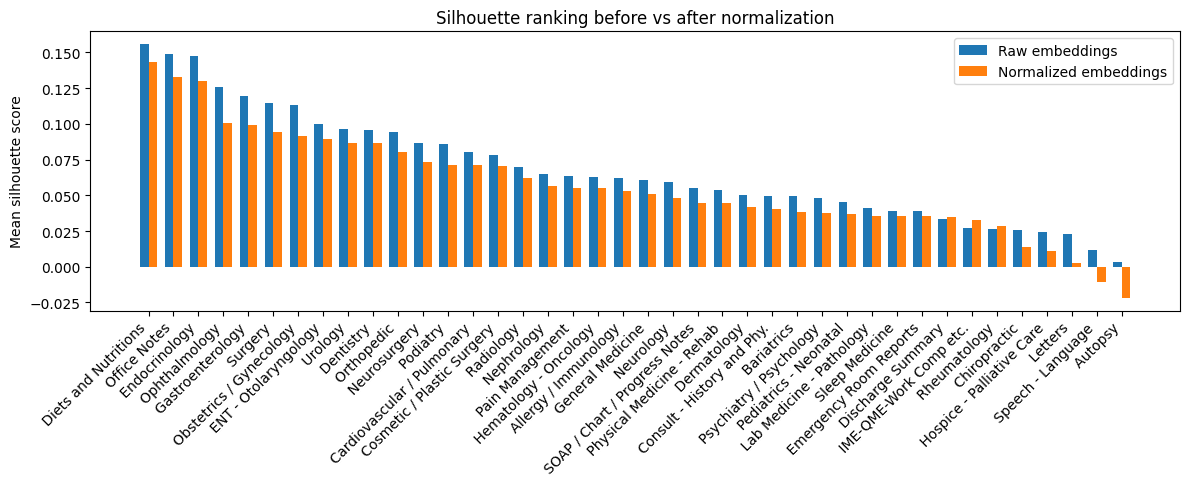

In [22]:
import numpy as np
import matplotlib.pyplot as plt

labels = top_k_df['label'].tolist()
raw_scores = top_k_df['silhouette'].tolist()
norm_scores = top_k_df_norm['silhouette'].tolist()

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 5))
plt.bar(x - width/2, raw_scores, width, label="Raw embeddings")
plt.bar(x + width/2, norm_scores, width, label="Normalized embeddings")

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("Mean silhouette score")
plt.title("Silhouette ranking before vs after normalization")
plt.legend()
plt.tight_layout()
plt.show()


What we observe is that with/without normalization, the labels are ranked the same way in terms of their silhouette score. The top 3 labels are most significantly differentiated from the other labels, followed by the top 8-10.

We thus chose to narrow down the dataset to contain only data from the **top 8** labels.

In [23]:
k = 8 
top_k_labels = top_k_df.index[:k].to_list()
top_k_label_names = top_k_df['label'][:k].to_list()
mask = np.isin(train_labels_enc, top_k_labels)
print("Length of dataset before: ", len(train_embeddings))
# Filter embeddings and labels
train_emb_topk = train_embeddings[mask]
train_labels_topk = train_labels_enc[mask]
print("Length after: ", len(train_emb_topk))

Length of dataset before:  3464
Length after:  1204


### Top-8 vs all labels: Performance Comparison

#### Baseline model (Naive Bayes)

Best performing baseline model

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import utils.task3_baseline_utils as base_utils

# Narrow down dataset to top-8 labels
# mask = np.isin(np.array(train_labels), top_k_label_names)
# X_train_topk = X_train_proc[mask]
# print("Train size before: ", len(train_labels))
# train_labels_topk = np.array(train_labels)[mask]
# print("Train size after: ", len(train_labels_topk))

# mask = np.isin(np.array(test_labels), top_k_label_names)
# X_test_topk = X_test_proc[mask]
# test_labels_topk = np.array(test_labels)[mask]


top_k_label_names = top_k_df['label'][:k].to_list()

mask_train = np.isin(train_labels, top_k_label_names)
mask_test  = np.isin(test_labels,  top_k_label_names)

X_train_topk = X_train_proc[mask_train]
train_labels_topk = np.array(train_labels)[mask_train]

X_test_topk = X_test_proc[mask_test]
test_labels_topk = np.array(test_labels)[mask_test]

# Logistic Regression
lr = LogisticRegression(
	max_iter=1000,
	n_jobs=-1,
	class_weight="balanced"
)

lr.fit(X_train_topk, train_labels_topk)
preds = lr.predict(X_test_topk)

base_utils.store_model_metrics_manual(
	test_labels_topk,
	preds,
	"Task3/results/logistic_regression_topk.csv"
)

# Linear SVM
svm = LinearSVC(
	C=0.01,
	class_weight="balanced"
)

svm.fit(X_train_topk, train_labels_topk)
preds = svm.predict(X_test_topk)

base_utils.store_model_metrics_manual(
	test_labels_topk,
	preds,
	"Task3/results/linear_svm_topk.csv"
)

# SGD
sgd = SGDClassifier(
	loss="hinge",
	alpha=1e-2,
	max_iter=1000,
	class_weight="balanced"
)

sgd.fit(X_train_topk, train_labels_topk)
preds = sgd.predict(X_test_topk)

base_utils.store_model_metrics_manual(
	test_labels_topk,
	preds,
	"Task3/results/sgd_topk.csv"
)

# Naive Bayes
nb = MultinomialNB(
	alpha=0.1  # Laplace smoothing, default is fine
)
nb.fit(X_train_topk, train_labels_topk)
preds = nb.predict(X_test_topk)

base_utils.store_model_metrics_manual(
	test_labels_topk,
	preds,
	"Task3/results/naive_bayes_topk.csv"
)



In [25]:
RESULT_PATHS = {
	"LR": "Task3/results/logistic_regression.csv",
	"LR_top_8_labels": "Task3/results/logistic_regression_topk.csv",
	"Linear SVM": "Task3/results/linear_svm.csv",
	"Linear SVM_top_8_labels": "Task3/results/linear_svm_topk.csv",
	"SGD-SVM": "Task3/results/sgd.csv",
	"SGD-SVM_top_8_labels": "Task3/results/sgd_topk.csv",
	"Naive_Bayes": "Task3/results/naive_bayes.csv",
	"Naive_Bayes_top_8_labels": "Task3/results/naive_bayes_topk.csv"

}

rows = []
for model_name, path in RESULT_PATHS.items():
	df = pd.read_csv(path)
	df["model"] = model_name
	rows.append(df)

summary_df = pd.concat(rows, ignore_index=True).set_index("model")

def highlight_max(s):
	is_max = s == s.max()
	return ['font-weight: bold' if v else '' for v in is_max]

summary_df.style.apply(highlight_max, axis=0)

,f1_weighted,accuracy,precision,recall,f1_macro
model,,,,,
LR,0.306662,0.352624,0.368757,0.352624,0.409055
LR_top_8_labels,0.700976,0.690522,0.765673,0.690522,0.644837
Linear SVM,0.312957,0.334455,0.382745,0.334455,0.342539
Linear SVM_top_8_labels,0.639669,0.663443,0.646761,0.663443,0.507997
SGD-SVM,0.248491,0.277927,0.328532,0.277927,0.283017
SGD-SVM_top_8_labels,0.651127,0.634429,0.710530,0.634429,0.528918
Naive_Bayes,0.346255,0.379542,0.363805,0.379542,0.252265
Naive_Bayes_top_8_labels,0.676970,0.686654,0.687436,0.686654,0.530120


- Based on the comparison on results from all baseline models, only all the classification results were affected by the filtering of only the top-k labels. 


#### Encoder model

In [26]:
import numpy as np

# Encode top-k label names to label ids
top_k_labels_enc = label_encoder.transform(top_k_label_names)

# Build masks
train_mask = np.isin(train_labels_enc, top_k_labels_enc)
test_mask  = np.isin(test_labels_enc,  top_k_labels_enc)

# Filter texts and labels
train_texts_topk  = np.array(train_texts)[train_mask].tolist()
train_labels_topk = np.array(train_labels_enc)[train_mask]

test_texts_topk   = np.array(test_texts)[test_mask].tolist()
test_labels_topk  = np.array(test_labels_enc)[test_mask]


In [30]:
# =========================
# Full SFT: Encoder + Linear Head (Top-8 labels)
# =========================

ENCODERS = {
    "BioClinicalBERT": "emilyalsentzer/Bio_ClinicalBERT",
    "PubMedBERT": "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract",
}

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_LEN = 512
BATCH_TRAIN = 16
BATCH_EVAL = 16

ALL_RESULTS = []
ALL_TRAIN_CURVES = {}

for enc_name, enc_id in ENCODERS.items():
    print("\n" + "=" * 80)
    print(f"Full SFT Encoder (Top-8): {enc_name}")
    print("=" * 80)

    tokenizer = AutoTokenizer.from_pretrained(enc_id)
    encoder = AutoModel.from_pretrained(enc_id)

    # Full fine-tuning
    for p in encoder.parameters():
        p.requires_grad = True

    model = EncoderClassifier(encoder, num_labels)

    # -------------------------
    # Dataset: TOP-K ONLY
    # -------------------------
    train_ds = TextDataset(
        train_texts_topk,
        train_labels_topk,
        tokenizer,
        MAX_LEN
    )
    test_ds = TextDataset(
        test_texts_topk,
        test_labels_topk,
        tokenizer,
        MAX_LEN
    )

    train_loader = DataLoader(
        train_ds,
        batch_size=BATCH_TRAIN,
        shuffle=True
    )
    test_loader = DataLoader(
        test_ds,
        batch_size=BATCH_EVAL,
        shuffle=False
    )

    # -------- Train (Full SFT) --------
    train_losses = run_one_setting(
        model=model,
        train_loader=train_loader,
        epochs=4,
        lr=1e-5,                 # standard SFT LR
        device=DEVICE,
        weight=class_weights_sqrt, # More stable
    )

    ALL_TRAIN_CURVES[f"{enc_name}_SFT_top8"] = train_losses

    # -------- Final test evaluation --------
    preds = get_predictions(model, test_loader, device=DEVICE)
    pred_labels = label_encoder.inverse_transform(preds)
    true_labels = label_encoder.inverse_transform(test_labels_topk)

    results_path = f"Task3/results/extratask_{enc_name}_SFT_top8.csv"

    base_utils.store_model_metrics_manual(
        y_true=true_labels,
        y_pred=pred_labels,
        results_path=results_path,
    )

    df = pd.read_csv(results_path)
    df["model"] = f"{enc_name}_SFT_top8"
    ALL_RESULTS.append(df)

    print(f"\n[TEST] {enc_name} Full SFT (Top-8) metrics:")
    print(df)



Full SFT Encoder (Top-8): BioClinicalBERT
[TRAIN] Epoch 1/4 | loss = 2.6180
[TRAIN] Epoch 2/4 | loss = 1.6224
[TRAIN] Epoch 3/4 | loss = 0.9252
[TRAIN] Epoch 4/4 | loss = 0.5881

[TEST] BioClinicalBERT Full SFT (Top-8) metrics:
   f1_weighted  accuracy  precision    recall  f1_macro  \
0      0.67758  0.667311   0.774764  0.667311  0.641941   

                      model  
0  BioClinicalBERT_SFT_top8  

Full SFT Encoder (Top-8): PubMedBERT


/storage/homefs/kw24z021/miniconda3/envs/task3-nlp/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[TRAIN] Epoch 1/4 | loss = 2.4872
[TRAIN] Epoch 2/4 | loss = 1.6573
[TRAIN] Epoch 3/4 | loss = 0.9923
[TRAIN] Epoch 4/4 | loss = 0.5880

[TEST] PubMedBERT Full SFT (Top-8) metrics:
   f1_weighted  accuracy  precision    recall  f1_macro                model
0     0.709536  0.702128   0.782649  0.702128  0.661895  PubMedBERT_SFT_top8


In [31]:
RESULT_PATHS = {
	"LR": "Task3/results/logistic_regression.csv",
	"LR_top_8_labels": "Task3/results/logistic_regression_topk.csv",
	# "Naive_Bayes": "Task3/results/naive_bayes.csv",
	# "Naive_Bayes_top_8_labels": "Task3/results/naive_bayes_topk.csv",
	"BioClinicalBERT_SFT": "Task3/results/subtask2_BioClinicalBERT_SFT.csv",
	"BioClinicalBERT_SFT_top_8_labels": "Task3/results/extratask_BioClinicalBERT_SFT_top8.csv",
	"PubMedBERT_SFT": "Task3/results/subtask2_PubMedBERT_SFT.csv",
	"PubMedBERT_SFT_top_8_labels": "Task3/results/extratask_PubMedBERT_SFT_top8.csv"

}

rows = []
for model_name, path in RESULT_PATHS.items():
	df = pd.read_csv(path)
	df["model"] = model_name
	rows.append(df)

summary_df = pd.concat(rows, ignore_index=True).set_index("model")

def highlight_max(s):
	is_max = s == s.max()
	return ['font-weight: bold' if v else '' for v in is_max]

summary_df.style.apply(highlight_max, axis=0)

,f1_weighted,accuracy,precision,recall,f1_macro
model,,,,,
LR,0.306662,0.352624,0.368757,0.352624,0.409055
LR_top_8_labels,0.700976,0.690522,0.765673,0.690522,0.644837
BioClinicalBERT_SFT,0.280933,0.345895,0.404606,0.345895,0.342471
BioClinicalBERT_SFT_top_8_labels,0.677580,0.667311,0.774764,0.667311,0.641941
PubMedBERT_SFT,0.299511,0.371467,0.382392,0.371467,0.412112
PubMedBERT_SFT_top_8_labels,0.709536,0.702128,0.782649,0.702128,0.661895


#### Brief Conclusion:

- Restricting the task to the top-8 most separable labels dramatically improves performance across all models, confirming that label ambiguity is a major bottleneck in the full 40-label setting.

- Under the top-8 setting, supervised fine-tuning of biomedical encoders (especially PubMedBERT) clearly outperforms classical baselines, achieving the highest macro-F1.

- LR or Naive Bayes benefit strongly from the reduced label space, but transformer-based SFT models provide the best overall balance between precision and recall.